# 1 Data wrangling<a id='2_Data_wrangling'></a>

## 1.1 Introduction<a id='2.2_Introduction'></a>

This dataset consist of several CSV files that contain number of geometric features of thousands of channel holes fabricated at nano-meter dimensions on a semconductor substrate. The data has tow parts 
1. Original features i.e. the geometric features are measured from image data that are unprocessed, 
2. Enhanced features i.e. geometric features are collected from processed images. 

Each part is subdivided further as 
1. features of a geometric fitted elliptical shape to the channel hole and 
2. features of the original shape.

Each image (of the same region) is acquired three times and the variation in geometric measurements of the same channel hole in three different images provide a measurement precision.
The customer wants to know the best protocol to achive optimal precision. There are four possibilities.
1. Class 1: Original/unprocessed image features and measurements on actual shape of the channel holes
2. Class 3: Enhanced/processed image features and measurement on actual shape of the channel holes
3. Class 2: Original/unprocessed image features and measurements on fitted elliptical shape to the channel holes
4. Class 4: Enhanced/processed image features and measurements on fitted elliptical shape to the channel holes

we are not working on class 3 and class 4 here as that would be the repetition of the same python code applied on the data from different files.

In the data-wrangling step we focus on collecting data, organizing it, and making sure it's well defined. Some data cleaning  and data exploration is also done here and described at corresponding steps.

## 1.2 Imports<a id='2.3_Imports'></a>

Placing imports together at the start 

In [42]:
#Code task 1#
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import glob
import copy
import string

## 1.3 Objectives<a id='2.4_Objectives'></a>

* Load the data sets, cleanup missing values, label corresponding rows in multiple files to indicate same original object

* Save cleaned files for data exploration stage

## 1.4 Parse The Data: Class 1 <a id='2.5_Load_The_Ski_Resort_Data'></a>

In [43]:
# the supplied CSV data file is the raw_data directory
# get data file names
path =r'C:\Users\umesh adiga\Desktop\SpringBoard\capstoneTwo\capstone2_data\Metrology\original'
# Get the list of all files in directory tree at given path
listOfFolders = [f.path for f in os.scandir(path) if f.is_dir()]

#There are three measurements for each channel hole using three images
# i.e. the first file in files_1 list below, files_2 list below and files_3 list below form a triplicate measurements
# from which precision in the form of standard deviation of measurements for a same channel hole as to be calculated.

files=[]

fx1=[]
fx2=[]
fx3=[]
for fold in listOfFolders:
    for file in glob.glob(fold + r"\csv0_noEllFit\OneDrive*_01_*.csv"):
        fx1.append(file)
    for file in glob.glob(fold + r"\csv0_noEllFit\OneDrive*_02_*.csv"):
        fx2.append(file)
    for file in glob.glob(fold + r"\csv0_noEllFit\OneDrive*_03_*.csv"):
        fx3.append(file)

files.append(fx1)
files.append(fx2)
files.append(fx3)
print(len(fx1))
print(len(fx2))
print(len(fx3))

11
11
11


Good first steps in auditing the data are the info method and displaying the first few records with head.

In [44]:
dfx = [] # data frame of frame of frames

for fx in range (0, len(files)):
    dfl=[]
    for file in files[fx]:
        df = pd.read_csv(file, header=None)
        dfl.append(df)
    dfx.append(dfl)

print(len(dfx))
print(len(dfx[0]))
print(len(dfx[0][0]))
print(len(dfx[1][0]))
print(len(dfx[2][0]))

3
11
1539
1552
1553


In [45]:
##Call the info method to do quick sanity check
dfx[0][0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539 entries, 0 to 1538
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1539 non-null   object 
 1   1       1539 non-null   object 
 2   2       1539 non-null   float64
 3   3       1539 non-null   float64
 4   4       1539 non-null   float64
 5   5       1539 non-null   float64
 6   6       1539 non-null   float64
 7   7       1539 non-null   float64
 8   8       1539 non-null   float64
 9   9       1539 non-null   float64
 10  10      1539 non-null   float64
 11  11      1539 non-null   float64
 12  12      1539 non-null   float64
 13  13      1539 non-null   float64
 14  14      1539 non-null   float64
 15  15      1539 non-null   float64
dtypes: float64(14), object(2)
memory usage: 192.5+ KB


In [46]:
dfx[0][0].head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2406_408,3.625229e-16,4.687607e-16,7.193437e-08,8.544922e-08,4.547634e-16,1.483433e-15,4.534274e-16,0.878787,101.936035,0.978325,5.981445e-08,6.066895e-08,5.810547e-08,5.981445e-08
1,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2314_408,3.979355e-16,5.089194e-16,7.585289e-08,8.886719e-08,5.189917e-16,1.636060e-15,4.870147e-16,0.815638,94.485428,0.974084,5.810547e-08,5.895996e-08,5.810547e-08,5.981445e-08
2,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2216_412,2.278090e-16,3.125072e-16,5.663939e-08,6.665039e-08,2.659693e-16,9.692724e-16,2.774596e-16,0.931644,79.474884,0.979592,5.810547e-08,5.554199e-08,5.810547e-08,5.810547e-08
3,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2826_480,4.307926e-16,5.454272e-16,7.826976e-08,9.228516e-08,4.874511e-16,1.774125e-15,5.315543e-16,0.948516,83.301819,0.977630,5.639648e-08,5.895996e-08,5.810547e-08,5.895996e-08
4,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,1056_484,4.786179e-16,5.994588e-16,8.289616e-08,9.741211e-08,5.734712e-16,1.979251e-15,5.928874e-16,0.931859,38.257317,0.974721,5.981445e-08,6.066895e-08,5.810547e-08,5.810547e-08


OK. This shows the number of entries in each of the triplets is not the same. We cannot calculate the standard deviation of the feature measurement for the same hole in the triplets (three measurements for each channel hole is made using three images) if we do not know which holes have missing measurements.

Column 1 in each file provides X_Y location of the channel hole. Ideally this X_Y location should be the same for all three channel holes that are considered triplicate data of the same channel hole. Unfortunately due to process issues it is no so (imaging stage drifts over time). Fortunately this drift is very small and it is possible to find the triplicate measurements of the same channel hole by finding the distance between X_Y locations and constrining it to be within certain distance. 

This process will also remove those channel holes with missing information (i.e. no triplicate measurements) from the further analysis process.

In [47]:
dfx[0][0].head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2406_408,3.625229e-16,4.687607e-16,7.193437e-08,8.544922e-08,4.547634e-16,1.483433e-15,4.534274e-16,0.878787,101.936035,0.978325,5.981445e-08,6.066895e-08,5.810547e-08,5.981445e-08
1,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2314_408,3.979355e-16,5.089194e-16,7.585289e-08,8.886719e-08,5.189917e-16,1.636060e-15,4.870147e-16,0.815638,94.485428,0.974084,5.810547e-08,5.895996e-08,5.810547e-08,5.981445e-08
2,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2216_412,2.278090e-16,3.125072e-16,5.663939e-08,6.665039e-08,2.659693e-16,9.692724e-16,2.774596e-16,0.931644,79.474884,0.979592,5.810547e-08,5.554199e-08,5.810547e-08,5.810547e-08
3,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2826_480,4.307926e-16,5.454272e-16,7.826976e-08,9.228516e-08,4.874511e-16,1.774125e-15,5.315543e-16,0.948516,83.301819,0.977630,5.639648e-08,5.895996e-08,5.810547e-08,5.895996e-08
4,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,1056_484,4.786179e-16,5.994588e-16,8.289616e-08,9.741211e-08,5.734712e-16,1.979251e-15,5.928874e-16,0.931859,38.257317,0.974721,5.981445e-08,6.066895e-08,5.810547e-08,5.810547e-08


In [48]:
dfx[1][0].head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2304_390,3.931895e-16,5.030781e-16,7.564556e-08,8.715820e-08,5.144122e-16,1.662640e-15,4.658401e-16,0.804967,92.404266,0.979091,5.725098e-08,6.066895e-08,5.810547e-08,5.981445e-08
1,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2400_390,3.658086e-16,4.738718e-16,7.314281e-08,8.715820e-08,4.547756e-16,1.482885e-15,4.702211e-16,0.862296,99.394135,0.969052,5.639648e-08,5.810547e-08,5.810547e-08,6.066895e-08
2,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2816_462,4.180148e-16,5.315542e-16,7.806242e-08,9.057617e-08,4.772711e-16,1.730527e-15,5.111099e-16,0.965194,69.705185,0.974468,5.810547e-08,5.895996e-08,5.810547e-08,5.725098e-08
3,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,1048_466,4.636496e-16,5.826652e-16,8.168773e-08,9.570313e-08,5.442243e-16,1.905842e-15,5.717129e-16,0.941196,66.464386,0.972435,5.725098e-08,5.895996e-08,5.810547e-08,5.981445e-08
4,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2628_466,5.428717e-16,6.717444e-16,8.873100e-08,1.042480e-07,6.226331e-16,2.219799e-15,6.790459e-16,0.953775,121.304008,0.971261,5.981445e-08,6.237793e-08,5.810547e-08,5.895996e-08


In [49]:
dfx[2][0].head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2390_374,3.574118e-16,4.636496e-16,7.193437e-08,8.544922e-08,4.461613e-16,1.456904e-15,4.534274e-16,0.867174,110.109604,0.974129,5.895996e-08,6.066895e-08,5.810547e-08,5.981445e-08
1,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2198_378,2.340153e-16,3.190786e-16,5.713994e-08,6.665039e-08,2.803704e-16,1.002762e-15,2.774596e-16,0.924549,99.283493,0.984639,5.810547e-08,5.639648e-08,5.810547e-08,5.725098e-08
2,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2814_444,4.216656e-16,5.366653e-16,7.877031e-08,9.228516e-08,4.910349e-16,1.718520e-15,5.315543e-16,0.940009,88.810051,0.967337,5.468750e-08,5.895996e-08,5.810547e-08,6.237793e-08
3,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,1042_450,4.632846e-16,5.833954e-16,8.189506e-08,9.741211e-08,5.242769e-16,1.901510e-15,5.844175e-16,0.960563,71.478729,0.973906,5.725098e-08,6.066895e-08,5.810547e-08,5.981445e-08
4,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,1876_452,4.505068e-16,5.673319e-16,7.997874e-08,9.399414e-08,5.181807e-16,1.874791e-15,5.519986e-16,0.973179,45.448242,0.973954,5.639648e-08,5.981445e-08,5.810547e-08,5.981445e-08


In [50]:
#dropping rows with NaN in all the data frames
for f in range(0, len(dfx)):
    for d in range(0, len(dfx[f])):
        dfx[f][d].dropna(inplace=True)   

OK, we do not have plausible column headings in the CSV files. So we must read the headings description file and provide column headings for further analysis

In [51]:
# Read header descriptor file
header_descriptor = r'C:\Users\umesh adiga\Desktop\SpringBoard\capstoneTwo\capstone2_data\Metrology\header.csv'
df = pd.read_csv(header_descriptor)
dflx= df.columns.tolist()
dfl=[]
for i in range(0, len(dflx)):
    dfl.append(dflx[i].strip())
    
for f in range(0, len(dfx)):
    for d in range(0, len(dfx[f])):
        dfx[f][d].columns=dfl
        dfx[1][0].columns=dfl
        dfx[2][0].columns=dfl


In [52]:
dfx[0][0].head()

,file_name,location (X_Y),area,area_fitted,perimeter,perimeter_Fitted,areaEnclosingCircle,areaFitEllipse,areaMinAreaRectangle,eccentricity,orientation,convexity,0degDiam,45degDiam,90degDiam,135degDiam
0,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2406_408,3.625229e-16,4.687607e-16,7.193437e-08,8.544922e-08,4.547634e-16,1.483433e-15,4.534274e-16,0.878787,101.936035,0.978325,5.981445e-08,6.066895e-08,5.810547e-08,5.981445e-08
1,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2314_408,3.979355e-16,5.089194e-16,7.585289e-08,8.886719e-08,5.189917e-16,1.636060e-15,4.870147e-16,0.815638,94.485428,0.974084,5.810547e-08,5.895996e-08,5.810547e-08,5.981445e-08
2,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2216_412,2.278090e-16,3.125072e-16,5.663939e-08,6.665039e-08,2.659693e-16,9.692724e-16,2.774596e-16,0.931644,79.474884,0.979592,5.810547e-08,5.554199e-08,5.810547e-08,5.810547e-08
3,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2826_480,4.307926e-16,5.454272e-16,7.826976e-08,9.228516e-08,4.874511e-16,1.774125e-15,5.315543e-16,0.948516,83.301819,0.977630,5.639648e-08,5.895996e-08,5.810547e-08,5.895996e-08
4,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,1056_484,4.786179e-16,5.994588e-16,8.289616e-08,9.741211e-08,5.734712e-16,1.979251e-15,5.928874e-16,0.931859,38.257317,0.974721,5.981445e-08,6.066895e-08,5.810547e-08,5.810547e-08


In [53]:
dfx[1][0].head()

,file_name,location (X_Y),area,area_fitted,perimeter,perimeter_Fitted,areaEnclosingCircle,areaFitEllipse,areaMinAreaRectangle,eccentricity,orientation,convexity,0degDiam,45degDiam,90degDiam,135degDiam
0,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2304_390,3.931895e-16,5.030781e-16,7.564556e-08,8.715820e-08,5.144122e-16,1.662640e-15,4.658401e-16,0.804967,92.404266,0.979091,5.725098e-08,6.066895e-08,5.810547e-08,5.981445e-08
1,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2400_390,3.658086e-16,4.738718e-16,7.314281e-08,8.715820e-08,4.547756e-16,1.482885e-15,4.702211e-16,0.862296,99.394135,0.969052,5.639648e-08,5.810547e-08,5.810547e-08,6.066895e-08
2,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2816_462,4.180148e-16,5.315542e-16,7.806242e-08,9.057617e-08,4.772711e-16,1.730527e-15,5.111099e-16,0.965194,69.705185,0.974468,5.810547e-08,5.895996e-08,5.810547e-08,5.725098e-08
3,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,1048_466,4.636496e-16,5.826652e-16,8.168773e-08,9.570313e-08,5.442243e-16,1.905842e-15,5.717129e-16,0.941196,66.464386,0.972435,5.725098e-08,5.895996e-08,5.810547e-08,5.981445e-08
4,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2628_466,5.428717e-16,6.717444e-16,8.873100e-08,1.042480e-07,6.226331e-16,2.219799e-15,6.790459e-16,0.953775,121.304008,0.971261,5.981445e-08,6.237793e-08,5.810547e-08,5.895996e-08


In [54]:
dfx[2][0].head()

,file_name,location (X_Y),area,area_fitted,perimeter,perimeter_Fitted,areaEnclosingCircle,areaFitEllipse,areaMinAreaRectangle,eccentricity,orientation,convexity,0degDiam,45degDiam,90degDiam,135degDiam
0,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2390_374,3.574118e-16,4.636496e-16,7.193437e-08,8.544922e-08,4.461613e-16,1.456904e-15,4.534274e-16,0.867174,110.109604,0.974129,5.895996e-08,6.066895e-08,5.810547e-08,5.981445e-08
1,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2198_378,2.340153e-16,3.190786e-16,5.713994e-08,6.665039e-08,2.803704e-16,1.002762e-15,2.774596e-16,0.924549,99.283493,0.984639,5.810547e-08,5.639648e-08,5.810547e-08,5.725098e-08
2,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2814_444,4.216656e-16,5.366653e-16,7.877031e-08,9.228516e-08,4.910349e-16,1.718520e-15,5.315543e-16,0.940009,88.810051,0.967337,5.468750e-08,5.895996e-08,5.810547e-08,6.237793e-08
3,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,1042_450,4.632846e-16,5.833954e-16,8.189506e-08,9.741211e-08,5.242769e-16,1.901510e-15,5.844175e-16,0.960563,71.478729,0.973906,5.725098e-08,6.066895e-08,5.810547e-08,5.981445e-08
4,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,1876_452,4.505068e-16,5.673319e-16,7.997874e-08,9.399414e-08,5.181807e-16,1.874791e-15,5.519986e-16,0.973179,45.448242,0.973954,5.639648e-08,5.981445e-08,5.810547e-08,5.981445e-08


##10E-09 is nanometer and 10E-18 is nanometer square (for area units): Push it into column headings and correct numerical values

In [55]:
for f in range(0, len(dfx)):
    for d in range(0, len(dfx[f])):
        dfx[f][d]['area'] = dfx[f][d]['area'].apply(lambda x:np.sqrt(x*(10E+18)))
        dfx[f][d]['area_fitted'] = dfx[f][d]['area_fitted'].apply(lambda x:np.sqrt(x*(10E+18)))
        dfx[f][d]['perimeter'] = dfx[f][d]['perimeter'].apply(lambda x:np.sqrt(x*(10E+09)))
        dfx[f][d]['perimeter_Fitted'] = dfx[f][d]['perimeter_Fitted'].apply(lambda x:np.sqrt(x*(10E+09)))
        dfx[f][d]['areaEnclosingCircle'] = dfx[f][d]['areaEnclosingCircle'].apply(lambda x:np.sqrt(x*(10E+18)))
        dfx[f][d]['areaFitEllipse'] = dfx[f][d]['areaFitEllipse'].apply(lambda x:np.sqrt(x*(10E+18)))
        dfx[f][d]['areaMinAreaRectangle'] = dfx[f][d]['areaMinAreaRectangle'].apply(lambda x:np.sqrt(x*(10E+18)))
        dfx[f][d]['0degDiam'] = dfx[f][d]['0degDiam'].apply(lambda x:np.sqrt(x*(10E+09)))
        dfx[f][d]['45degDiam'] = dfx[f][d]['45degDiam'].apply(lambda x:np.sqrt(x*(10E+09)))
        dfx[f][d]['90degDiam'] = dfx[f][d]['90degDiam'].apply(lambda x:np.sqrt(x*(10E+09)))
        dfx[f][d]['135degDiam'] = dfx[f][d]['135degDiam'].apply(lambda x:np.sqrt(x*(10E+09)))



In [56]:
dfx[0][0].head()

,file_name,location (X_Y),area,area_fitted,perimeter,perimeter_Fitted,areaEnclosingCircle,areaFitEllipse,areaMinAreaRectangle,eccentricity,orientation,convexity,0degDiam,45degDiam,90degDiam,135degDiam
0,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2406_408,60.209876,68.466105,26.820584,29.231699,67.436145,121.796272,67.337020,0.878787,101.936035,0.978325,24.456993,24.631068,24.105076,24.456993
1,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2314_408,63.082131,71.338586,27.541403,29.810600,72.041079,127.908558,69.786436,0.815638,94.485428,0.974084,24.105076,24.281672,24.105076,24.456993
2,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2216_412,47.729337,55.902340,23.799032,25.816737,51.572216,98.451635,52.674438,0.931644,79.474884,0.979592,24.105076,23.567348,24.105076,24.105076
3,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2826_480,65.634792,73.853045,27.976733,30.378472,69.817696,133.196290,72.907767,0.948516,83.301819,0.977630,23.747943,24.281672,24.105076,24.281672
4,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,1056_484,69.182213,77.424727,28.791694,31.210913,75.727878,140.685868,76.999184,0.931859,38.257317,0.974721,24.456993,24.631068,24.105076,24.105076


In [57]:
dfx[1][0].head()

,file_name,location (X_Y),area,area_fitted,perimeter,perimeter_Fitted,areaEnclosingCircle,areaFitEllipse,areaMinAreaRectangle,eccentricity,orientation,convexity,0degDiam,45degDiam,90degDiam,135degDiam
0,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2304_390,62.704825,70.928000,27.503737,29.522568,71.722532,128.943413,68.252481,0.804967,92.404266,0.979091,23.927177,24.631068,24.105076,24.456993
1,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2400_390,60.482115,68.838350,27.044927,29.522568,67.437051,121.773773,68.572668,0.862296,99.394135,0.969052,23.747943,24.105076,24.105076,24.631068
2,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2816_462,64.654067,72.907767,27.939654,30.095876,69.084811,131.549501,71.491950,0.965194,69.705185,0.974468,24.105076,24.281672,24.105076,23.927177
3,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,1048_466,68.091824,76.332511,28.581065,30.935922,73.771562,138.052232,75.611698,0.941196,66.464386,0.972435,23.927177,24.281672,24.105076,24.456993
4,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2628_466,73.679826,81.960013,29.787749,32.287466,78.907107,148.989889,82.404243,0.953775,121.304008,0.971261,24.456993,24.975574,24.105076,24.281672


In [58]:
dfx[2][0].head()

,file_name,location (X_Y),area,area_fitted,perimeter,perimeter_Fitted,areaEnclosingCircle,areaFitEllipse,areaMinAreaRectangle,eccentricity,orientation,convexity,0degDiam,45degDiam,90degDiam,135degDiam
0,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2390_374,59.783929,68.091824,26.820584,29.231699,66.795307,120.702258,67.337020,0.867174,110.109604,0.974129,24.281672,24.631068,24.105076,24.456993
1,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2198_378,48.375127,56.487041,23.903963,25.816737,52.950011,100.138026,52.674438,0.924549,99.283493,0.984639,24.105076,23.747943,24.105076,23.927177
2,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2814_444,64.935786,73.257446,28.066049,30.378472,70.073886,131.092326,72.907767,0.940009,88.810051,0.967337,23.385359,24.281672,24.105076,24.975574
3,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,1042_450,68.065011,76.380324,28.617313,31.210913,72.406969,137.895263,76.447202,0.960563,71.478729,0.973906,23.927177,24.631068,24.105076,24.456993
4,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,1876_452,67.119805,75.321440,28.280513,30.658464,71.984770,136.923020,74.296609,0.973179,45.448242,0.973954,23.747943,24.456993,24.105076,24.456993


## 1.5 Provide index label for rows based on location and correspondance in triplets <a id='2.6_Explore_The_Data'></a>

### 1.5.1 Create a primary index label column in the first dataframe of the triplets <a id='2.6.1_Find_Your_Resort_Of_Interest'></a>

This means, we force sequential labeling in dfx[0][*] dataframe as that is considered primary file/frame and match dfx[1][*] and dfx[2][*] columns to the primary frame. All the rows that are not represented by three measurements are discarded.

In [59]:
for f in range(0, len(dfx[0])):
    label_hole=[]
    for i in range(0, len(dfx[0][f])):
        label_hole.append((i+1))
    lb = pd.Series(label_hole)
    dfx[0][f].insert(1, "label", lb)

for f in range(0, len(dfx[1])):
    label_hole=[]
    for i in range(0, len(dfx[1][f])):
        label_hole.append((i+1))
    lb = pd.Series(label_hole)
    dfx[1][f].insert(1, "label", lb)
    
for f in range(0, len(dfx[2])):
    label_hole=[]
    for i in range(0, len(dfx[2][f])):
        label_hole.append((i+1))
    lb = pd.Series(label_hole)
    dfx[2][f].insert(1, "label", lb)    

In [60]:
dfx[0][0].head()

,file_name,label,location (X_Y),area,area_fitted,perimeter,perimeter_Fitted,areaEnclosingCircle,areaFitEllipse,areaMinAreaRectangle,eccentricity,orientation,convexity,0degDiam,45degDiam,90degDiam,135degDiam
0,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,1,2406_408,60.209876,68.466105,26.820584,29.231699,67.436145,121.796272,67.337020,0.878787,101.936035,0.978325,24.456993,24.631068,24.105076,24.456993
1,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2,2314_408,63.082131,71.338586,27.541403,29.810600,72.041079,127.908558,69.786436,0.815638,94.485428,0.974084,24.105076,24.281672,24.105076,24.456993
2,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,3,2216_412,47.729337,55.902340,23.799032,25.816737,51.572216,98.451635,52.674438,0.931644,79.474884,0.979592,24.105076,23.567348,24.105076,24.105076
3,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,4,2826_480,65.634792,73.853045,27.976733,30.378472,69.817696,133.196290,72.907767,0.948516,83.301819,0.977630,23.747943,24.281672,24.105076,24.281672
4,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,5,1056_484,69.182213,77.424727,28.791694,31.210913,75.727878,140.685868,76.999184,0.931859,38.257317,0.974721,24.456993,24.631068,24.105076,24.105076


In [61]:
dfx[1][0].head()

,file_name,label,location (X_Y),area,area_fitted,perimeter,perimeter_Fitted,areaEnclosingCircle,areaFitEllipse,areaMinAreaRectangle,eccentricity,orientation,convexity,0degDiam,45degDiam,90degDiam,135degDiam
0,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,1,2304_390,62.704825,70.928000,27.503737,29.522568,71.722532,128.943413,68.252481,0.804967,92.404266,0.979091,23.927177,24.631068,24.105076,24.456993
1,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2,2400_390,60.482115,68.838350,27.044927,29.522568,67.437051,121.773773,68.572668,0.862296,99.394135,0.969052,23.747943,24.105076,24.105076,24.631068
2,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,3,2816_462,64.654067,72.907767,27.939654,30.095876,69.084811,131.549501,71.491950,0.965194,69.705185,0.974468,24.105076,24.281672,24.105076,23.927177
3,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,4,1048_466,68.091824,76.332511,28.581065,30.935922,73.771562,138.052232,75.611698,0.941196,66.464386,0.972435,23.927177,24.281672,24.105076,24.456993
4,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,5,2628_466,73.679826,81.960013,29.787749,32.287466,78.907107,148.989889,82.404243,0.953775,121.304008,0.971261,24.456993,24.975574,24.105076,24.281672


In [62]:
dfx[2][0].head()

,file_name,label,location (X_Y),area,area_fitted,perimeter,perimeter_Fitted,areaEnclosingCircle,areaFitEllipse,areaMinAreaRectangle,eccentricity,orientation,convexity,0degDiam,45degDiam,90degDiam,135degDiam
0,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,1,2390_374,59.783929,68.091824,26.820584,29.231699,66.795307,120.702258,67.337020,0.867174,110.109604,0.974129,24.281672,24.631068,24.105076,24.456993
1,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,2,2198_378,48.375127,56.487041,23.903963,25.816737,52.950011,100.138026,52.674438,0.924549,99.283493,0.984639,24.105076,23.747943,24.105076,23.927177
2,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,3,2814_444,64.935786,73.257446,28.066049,30.378472,70.073886,131.092326,72.907767,0.940009,88.810051,0.967337,23.385359,24.281672,24.105076,24.975574
3,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,4,1042_450,68.065011,76.380324,28.617313,31.210913,72.406969,137.895263,76.447202,0.960563,71.478729,0.973906,23.927177,24.631068,24.105076,24.456993
4,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,5,1876_452,67.119805,75.321440,28.280513,30.658464,71.984770,136.923020,74.296609,0.973179,45.448242,0.973954,23.747943,24.456993,24.105076,24.456993


### 1.5.2 Label corresponding rows in other triplicate files<a id='2.6.2_Number_Of_Missing_Values_By_Column'></a>

The three triplicate files are suppose to have same number of rows indicating that these three files together have three measurements for each channel hole structure.
When we look at the number of rows in each of the tripicate files, they are not same. For example
dfx[0][0] has 1539 rows
dfx[1][0] has 1552 rows
dfx[2][0] has 1553 rows.

In addition, there is no guarantee that 1539 rows in dfx[0][0] are all represented in dfx[1][0] and dfx[2][0]

Known information: Column location(X_Y) gives the (x, y) coordinates of the approximate center of the holes.
We know that these holes have not drifted more than a "certain" distance due to stage drift. 
So, we should calculate the distance of every hole (say nearby few (~20) holes are OK as the CSV files are some what ordered in raster scan type) in dfx[0][0] from dfx[1][0] and dfx[2][0]. The nearest hole in dfx[1][0] and dfx[2][0] that is within "certain" distance will then be given same label as in dfx[0][0]

### 1.5.3 Identify missing data<a id='2.6.3_Categorical_Features'></a>

If the label is not present in all the files of the triplicate, then that row (channel hole) is considered missing crucial data for precision calculation and the corresponding label (and features) are not analyzed further.

######## We know bottom 25% and top 25% of the image is crappy (due to specimen issues) and hence the measurements from those regions have to be discarded. This means, all measures ments where Y location is less than 1024 or more than 3072 (image channel holes is of size 4096X4096) should be discarded.

In [63]:
def dist(x1, y1, x2, y2):
    return(np.sqrt((x1-x2)*(x1-x2)+(y1-y2)*(y1-y2)))

#Make a deep copy of dfx for finding missing data
dfy = copy.deepcopy(dfx)

for f in range(0, len(dfx[0])): # there are about 11 data sets (each with triplicate measurements)
    for k in range(0, 3):
        for f1 in range(0, len(dfx[k][f])):
            loc = dfx[k][f]['location (X_Y)'][f1] 
            x = float(loc.split("_")[0])
            y = float(loc.split("_")[1])
            if (y<1024) or (y>=3072):
                dfx[k][f].at[f1, 'label'] = -1
                
for f in range(0, len(dfx[0])): # there are about 11 data sets (each with triplicate measurements)
    for f1 in range(0, len(dfx[1][f])): # each row of the corresponding csv file is to be analysed
        # second measurement of the triplicate
        lab1=dfx[1][f]['label'][f1]
        loc1 = dfx[1][f]['location (X_Y)'][f1] 
        x1 = float(loc1.split("_")[0])
        y1 = float(loc1.split("_")[1])

        d1=1000
        labx=-1
        for f2 in range((f1-100), (f1+100)):
            if f2<0:
                continue
            if f2>=len(dfx[0][f]):
                break
            try:
                #primary measurement of the triplicate
                loc = dfx[0][f]['location (X_Y)'][f2] 
                lab0 = dfx[0][f]['label'][f2]
                x = float(loc.split("_")[0])
                y = float(loc.split("_")[1])
                d0 = dist(x1, y1, x, y)
                if(d0 < d1):
                    d1= d0
                    labx=lab0
            except:
                ;
                #print(f, f1, len(dfx[1][f]), f2, len(dfx[0][f]), loc)
        
        # distances 200 (between first and second images)  are determined experimentally
        if (lab1 != -1) and (lab0 != -1):
            if (d1 < 200): 
                dfx[1][f].at[f1, 'label'] = labx
            else:
                dfx[1][f].at[f1, 'label'] = -1
                dfx[0][f].at[f1, 'label'] = -1
        else:
            dfx[1][f].at[f1, 'label'] = -1
            dfx[0][f].at[f1, 'label'] = -1
            
    for f1 in range(0, len(dfx[2][f])):
        lab1=dfx[2][f]['label'][f1]
        loc1 = dfx[2][f]['location (X_Y)'][f1] 
        x1 = float(loc1.split("_")[0])
        y1 = float(loc1.split("_")[1])

        d1=1000
        labx=-1
        for f2 in range((f1-200), (f1+200)):
            if f2<0:
                continue
            if f2>=len(dfx[0][f]):
                break
            try:
                #primary measurement of the triplicate
                loc = dfx[0][f]['location (X_Y)'][f2] 
                lab0 = dfx[0][f]['label'][f2]
                x = float(loc.split("_")[0])
                y = float(loc.split("_")[1])
                d0 = dist(x1, y1, x, y)
                if(d0 < d1):
                    d1= d0
                    labx=lab0
            except:
                ;
                #print(f, f1, len(dfx[1][f]), f2, len(dfx[0][f]), loc)
        
        # distances 300 (between first and second images)  are determined experimentally
        if (lab1 != -1) and (lab0 != -1):
            if (d1 < 300): 
                dfx[2][f].at[f1, 'label'] = labx
            else:
                dfx[2][f].at[f1, 'label'] = -1
                dfx[1][f].at[f1, 'label'] = -1
                dfx[0][f].at[f1, 'label'] = -1
        else:
            dfx[2][f].at[f1, 'label'] = -1
            dfx[1][f].at[f1, 'label'] = -1
            dfx[0][f].at[f1, 'label'] = -1


In [64]:
dfx[0][0].head()

,file_name,label,location (X_Y),area,area_fitted,perimeter,perimeter_Fitted,areaEnclosingCircle,areaFitEllipse,areaMinAreaRectangle,eccentricity,orientation,convexity,0degDiam,45degDiam,90degDiam,135degDiam
0,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,-1.0,2406_408,60.209876,68.466105,26.820584,29.231699,67.436145,121.796272,67.337020,0.878787,101.936035,0.978325,24.456993,24.631068,24.105076,24.456993
1,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,-1.0,2314_408,63.082131,71.338586,27.541403,29.810600,72.041079,127.908558,69.786436,0.815638,94.485428,0.974084,24.105076,24.281672,24.105076,24.456993
2,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,-1.0,2216_412,47.729337,55.902340,23.799032,25.816737,51.572216,98.451635,52.674438,0.931644,79.474884,0.979592,24.105076,23.567348,24.105076,24.105076
3,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,-1.0,2826_480,65.634792,73.853045,27.976733,30.378472,69.817696,133.196290,72.907767,0.948516,83.301819,0.977630,23.747943,24.281672,24.105076,24.281672
4,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,-1.0,1056_484,69.182213,77.424727,28.791694,31.210913,75.727878,140.685868,76.999184,0.931859,38.257317,0.974721,24.456993,24.631068,24.105076,24.105076


In [65]:
#remove the labels with '-1' label as it indicates triplicate is not fully present
for f in range(0, len(dfx)):
    for d in range(0, len(dfx[0])):
        dfx[f][d]=dfx[f][d][dfx[f][d].label != -1]

In [66]:
# check whether the length of the triplets are close to one another
for f in range(0, len(dfx)):    
    print(f, d, len(dfx[f][0]))

#sorting by label
dfx[1][0].sort_values(by=['label'], inplace=True)
dfx[1][0].head()

0 10 760
1 10 760
2 10 760


,file_name,label,location (X_Y),area,area_fitted,perimeter,perimeter_Fitted,areaEnclosingCircle,areaFitEllipse,areaMinAreaRectangle,eccentricity,orientation,convexity,0degDiam,45degDiam,90degDiam,135degDiam
322,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,324.0,958_1088,75.030060,83.329421,30.156348,32.551042,80.590521,152.198505,83.722794,0.937859,74.027878,0.969811,23.927177,23.385359,24.105076,23.747943
336,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,325.0,118_1090,80.635274,89.006756,31.255494,34.089726,87.538779,163.493037,91.713727,0.944779,75.765022,0.968988,24.105076,24.105076,24.105076,23.747943
337,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,326.0,212_1092,76.475859,84.805930,30.390180,33.071892,81.315237,154.231681,85.808339,0.929383,82.846664,0.971498,24.456993,23.747943,24.105076,23.385359
327,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,327.0,398_1090,74.810780,83.241752,30.142106,33.071892,81.326090,150.133665,85.020899,0.901601,100.081467,0.968414,24.281672,23.747943,24.105076,23.567348
339,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,328.0,676_1090,74.761964,83.110075,30.024451,32.812500,80.522921,150.401775,84.934981,0.905185,95.048309,0.968987,23.927177,23.747943,24.105076,23.567348


In [67]:
#dropping rows with NaN in all the data frames
for f in range(0, len(dfx)):
    for d in range(0, len(dfx[f])):
        dfx[f][d].dropna(inplace=True) 

In [68]:
dfx[0][0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 322 to 1081
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   file_name             760 non-null    object 
 1   label                 760 non-null    float64
 2   location (X_Y)        760 non-null    object 
 3   area                  760 non-null    float64
 4   area_fitted           760 non-null    float64
 5   perimeter             760 non-null    float64
 6   perimeter_Fitted      760 non-null    float64
 7   areaEnclosingCircle   760 non-null    float64
 8   areaFitEllipse        760 non-null    float64
 9   areaMinAreaRectangle  760 non-null    float64
 10  eccentricity          760 non-null    float64
 11  orientation           760 non-null    float64
 12  convexity             760 non-null    float64
 13  0degDiam              760 non-null    float64
 14  45degDiam             760 non-null    float64
 15  90degDiam           

In [69]:
dfx[1][0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 322 to 1077
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   file_name             760 non-null    object 
 1   label                 760 non-null    float64
 2   location (X_Y)        760 non-null    object 
 3   area                  760 non-null    float64
 4   area_fitted           760 non-null    float64
 5   perimeter             760 non-null    float64
 6   perimeter_Fitted      760 non-null    float64
 7   areaEnclosingCircle   760 non-null    float64
 8   areaFitEllipse        760 non-null    float64
 9   areaMinAreaRectangle  760 non-null    float64
 10  eccentricity          760 non-null    float64
 11  orientation           760 non-null    float64
 12  convexity             760 non-null    float64
 13  0degDiam              760 non-null    float64
 14  45degDiam             760 non-null    float64
 15  90degDiam           

In [70]:
dfx[2][0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 322 to 1081
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   file_name             760 non-null    object 
 1   label                 760 non-null    int64  
 2   location (X_Y)        760 non-null    object 
 3   area                  760 non-null    float64
 4   area_fitted           760 non-null    float64
 5   perimeter             760 non-null    float64
 6   perimeter_Fitted      760 non-null    float64
 7   areaEnclosingCircle   760 non-null    float64
 8   areaFitEllipse        760 non-null    float64
 9   areaMinAreaRectangle  760 non-null    float64
 10  eccentricity          760 non-null    float64
 11  orientation           760 non-null    float64
 12  convexity             760 non-null    float64
 13  0degDiam              760 non-null    float64
 14  45degDiam             760 non-null    float64
 15  90degDiam           

#### 1.5.4 Drop rows with NaN <a id='2.6.3.1_Unique_Resort_Names'></a>

In [71]:
##convert all values in the dataframe to string
#for f in range(0, len(dfx)):
#    for d in range(0, len(dfx[f])):
#        dfx[f][d].applymap(str)
#dropping rows with NaN in all the data frames
for f in range(0, len(dfx)):
    for d in range(0, len(dfx[f])):
        dfx[f][d].dropna(inplace=True)     

Now we have labelled 0 (and hence can ignore) all the channel holes that are not represented by triplicate measurements

In [72]:
dfx[0][0].head()

,file_name,label,location (X_Y),area,area_fitted,perimeter,perimeter_Fitted,areaEnclosingCircle,areaFitEllipse,areaMinAreaRectangle,eccentricity,orientation,convexity,0degDiam,45degDiam,90degDiam,135degDiam
322,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,323.0,2774_1038,74.001196,82.404244,29.940978,32.812500,80.321512,148.957754,84.555875,0.930036,90.685677,0.969619,23.927177,23.747943,24.105076,23.747943
323,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,324.0,966_1108,75.611697,83.897037,30.107693,32.812500,81.034480,151.926119,85.020899,0.917029,78.748344,0.975701,23.567348,23.567348,24.105076,24.105076
324,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,325.0,128_1112,80.657909,88.924685,31.061577,33.838137,86.342988,162.720580,90.430954,0.921181,84.950310,0.977510,23.567348,23.567348,24.105076,23.747943
325,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,326.0,220_1110,76.404219,84.633560,30.190705,32.812500,81.818974,154.113982,85.020899,0.913853,87.975098,0.979779,23.927177,23.747943,24.105076,23.927177
326,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,327.0,406_1110,75.418317,83.809961,30.225023,33.071892,80.682703,152.119399,86.350230,0.933167,104.249344,0.969508,24.105076,23.747943,24.105076,23.567348


In [73]:
dfx[1][0].head()

,file_name,label,location (X_Y),area,area_fitted,perimeter,perimeter_Fitted,areaEnclosingCircle,areaFitEllipse,areaMinAreaRectangle,eccentricity,orientation,convexity,0degDiam,45degDiam,90degDiam,135degDiam
322,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,324.0,958_1088,75.030060,83.329421,30.156348,32.551042,80.590521,152.198505,83.722794,0.937859,74.027878,0.969811,23.927177,23.385359,24.105076,23.747943
336,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,325.0,118_1090,80.635274,89.006756,31.255494,34.089726,87.538779,163.493037,91.713727,0.944779,75.765022,0.968988,24.105076,24.105076,24.105076,23.747943
337,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,326.0,212_1092,76.475859,84.805930,30.390180,33.071892,81.315237,154.231681,85.808339,0.929383,82.846664,0.971498,24.456993,23.747943,24.105076,23.385359
327,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,327.0,398_1090,74.810780,83.241752,30.142106,33.071892,81.326090,150.133665,85.020899,0.901601,100.081467,0.968414,24.281672,23.747943,24.105076,23.567348
339,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,328.0,676_1090,74.761964,83.110075,30.024451,32.812500,80.522921,150.401775,84.934981,0.905185,95.048309,0.968987,23.927177,23.747943,24.105076,23.567348


In [74]:
dfx[2][0].head()

,file_name,label,location (X_Y),area,area_fitted,perimeter,perimeter_Fitted,areaEnclosingCircle,areaFitEllipse,areaMinAreaRectangle,eccentricity,orientation,convexity,0degDiam,45degDiam,90degDiam,135degDiam
322,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,330,1510_1070,76.809296,85.063830,30.438383,32.812500,82.349266,156.142465,85.020899,0.948540,63.438557,0.972908,24.105076,23.567348,24.105076,24.281672
323,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,331,2158_1070,81.490964,89.863984,31.368531,34.339471,87.784166,163.809751,93.123961,0.924982,94.864563,0.970651,24.105076,23.747943,24.105076,23.567348
324,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,332,2250_1068,74.981387,83.241752,29.989904,32.551042,80.704836,151.980667,83.722794,0.941909,110.567902,0.974067,24.105076,23.747943,24.105076,23.927177
325,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,333,2902_1068,75.127312,83.460752,30.107693,32.812500,79.915418,151.803503,85.106737,0.937257,86.713776,0.965646,23.747943,23.927177,24.105076,24.105076
326,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,334,2996_1068,76.428106,84.719789,30.225023,33.071892,83.165661,153.775347,86.299483,0.905639,90.224052,0.976205,23.747943,23.747943,24.105076,24.281672


#### 1.5.5 order all the dataframes based on label <a id='2.6.3.5_Distribution_Of_Ticket_Price_By_State'></a>

In [75]:
#sorting by label
for f in range(0, len(dfx)):
    for d in range(0, len(dfx[f])):        
        dfx[f][d].sort_values(by=['label'], inplace=True)

In [76]:
dfx[0][0].head()

,file_name,label,location (X_Y),area,area_fitted,perimeter,perimeter_Fitted,areaEnclosingCircle,areaFitEllipse,areaMinAreaRectangle,eccentricity,orientation,convexity,0degDiam,45degDiam,90degDiam,135degDiam
322,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,323.0,2774_1038,74.001196,82.404244,29.940978,32.812500,80.321512,148.957754,84.555875,0.930036,90.685677,0.969619,23.927177,23.747943,24.105076,23.747943
323,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,324.0,966_1108,75.611697,83.897037,30.107693,32.812500,81.034480,151.926119,85.020899,0.917029,78.748344,0.975701,23.567348,23.567348,24.105076,24.105076
324,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,325.0,128_1112,80.657909,88.924685,31.061577,33.838137,86.342988,162.720580,90.430954,0.921181,84.950310,0.977510,23.567348,23.567348,24.105076,23.747943
325,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,326.0,220_1110,76.404219,84.633560,30.190705,32.812500,81.818974,154.113982,85.020899,0.913853,87.975098,0.979779,23.927177,23.747943,24.105076,23.927177
326,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,327.0,406_1110,75.418317,83.809961,30.225023,33.071892,80.682703,152.119399,86.350230,0.933167,104.249344,0.969508,24.105076,23.747943,24.105076,23.567348


In [77]:
dfx[1][0].head()

,file_name,label,location (X_Y),area,area_fitted,perimeter,perimeter_Fitted,areaEnclosingCircle,areaFitEllipse,areaMinAreaRectangle,eccentricity,orientation,convexity,0degDiam,45degDiam,90degDiam,135degDiam
322,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,324.0,958_1088,75.030060,83.329421,30.156348,32.551042,80.590521,152.198505,83.722794,0.937859,74.027878,0.969811,23.927177,23.385359,24.105076,23.747943
336,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,325.0,118_1090,80.635274,89.006756,31.255494,34.089726,87.538779,163.493037,91.713727,0.944779,75.765022,0.968988,24.105076,24.105076,24.105076,23.747943
337,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,326.0,212_1092,76.475859,84.805930,30.390180,33.071892,81.315237,154.231681,85.808339,0.929383,82.846664,0.971498,24.456993,23.747943,24.105076,23.385359
327,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,327.0,398_1090,74.810780,83.241752,30.142106,33.071892,81.326090,150.133665,85.020899,0.901601,100.081467,0.968414,24.281672,23.747943,24.105076,23.567348
339,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,328.0,676_1090,74.761964,83.110075,30.024451,32.812500,80.522921,150.401775,84.934981,0.905185,95.048309,0.968987,23.927177,23.747943,24.105076,23.567348


##### 1.5.5 Save data frames as CSV files <a id='2.6.3.5.1_Average_weekend_and_weekday_price_by_state'></a>

In [78]:
'''Check if directory exists, if not, create it'''
# You should change 'test' to your preferred folder.
MYDIR = "C:\\Users\\umesh adiga\\Desktop\\SpringBoard\\capstoneTwo\\Proposal01_ExampleData\\Metrology\\wrangled_data\\original"
CHECK_FOLDER = os.path.isdir(MYDIR)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(MYDIR)
    print("created folder : ", MYDIR)
else:
    print(MYDIR, "folder already exists.")
    
for f in range(0, len(dfx)):
    for d in range(0, len(dfx[f])):        
        name = "\\0"+ str(d) + "_" + str(f)+".csv"
        if(d>9):
            name = "\\" + str(d) + "-" + str(f) + ".csv"
        dfx[f][d].to_csv(MYDIR+name)

C:\Users\umesh adiga\Desktop\SpringBoard\capstoneTwo\Proposal01_ExampleData\Metrology\wrangled_data\original folder already exists.


In [79]:
dfx[0][0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 322 to 1081
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   file_name             760 non-null    object 
 1   label                 760 non-null    float64
 2   location (X_Y)        760 non-null    object 
 3   area                  760 non-null    float64
 4   area_fitted           760 non-null    float64
 5   perimeter             760 non-null    float64
 6   perimeter_Fitted      760 non-null    float64
 7   areaEnclosingCircle   760 non-null    float64
 8   areaFitEllipse        760 non-null    float64
 9   areaMinAreaRectangle  760 non-null    float64
 10  eccentricity          760 non-null    float64
 11  orientation           760 non-null    float64
 12  convexity             760 non-null    float64
 13  0degDiam              760 non-null    float64
 14  45degDiam             760 non-null    float64
 15  90degDiam           

### 2.0 Repeat the process for enhanced data <a id='2.13_Summary'></a>

In [80]:
#As this step is repeat of the above steps on a different data sets, I have excluded all explanatory comments.

path =r'C:\Users\umesh adiga\Desktop\SpringBoard\capstoneTwo\capstone2_data\Metrology\enhanced'
listOfFolders = [f.path for f in os.scandir(path) if f.is_dir()]

files=[]

fx1=[]
fx2=[]
fx3=[]
for fold in listOfFolders:
    for file in glob.glob(fold + r"\csv0_noEllFit\Enhanced*_01_*.csv"):
        fx1.append(file)
    for file in glob.glob(fold + r"\csv0_noEllFit\Enhanced*_02_*.csv"):
        fx2.append(file)
    for file in glob.glob(fold + r"\csv0_noEllFit\Enhanced*_03_*.csv"):
        fx3.append(file)

files.append(fx1)
files.append(fx2)
files.append(fx3)

dfx = [] # data frame of frame of frames

for fx in range (0, len(files)):
    dfl=[]
    for file in files[fx]:
        df = pd.read_csv(file, header=None)
        dfl.append(df)
    dfx.append(dfl)

#dropping rows with NaN in all the data frames
for f in range(0, len(dfx)):
    for d in range(0, len(dfx[f])):
        dfx[f][d].dropna(inplace=True)   
        
# Read header descriptor file
header_descriptor = r'C:\Users\umesh adiga\Desktop\SpringBoard\capstoneTwo\capstone2_data\Metrology\header.csv'
df = pd.read_csv(header_descriptor)
dflx= df.columns.tolist()
dfl=[]
for i in range(0, len(dflx)):
    dfl.append(dflx[i].strip())
    
for f in range(0, len(dfx)):
    for d in range(0, len(dfx[f])):
        dfx[f][d].columns=dfl
        dfx[1][0].columns=dfl
        dfx[2][0].columns=dfl

for f in range(0, len(dfx)):
    for d in range(0, len(dfx[f])):
        dfx[f][d]['area'] = dfx[f][d]['area'].apply(lambda x:np.sqrt(x*(10E+18)))
        dfx[f][d]['area_fitted'] = dfx[f][d]['area_fitted'].apply(lambda x:np.sqrt(x*(10E+18)))
        dfx[f][d]['perimeter'] = dfx[f][d]['perimeter'].apply(lambda x:np.sqrt(x*(10E+09)))
        dfx[f][d]['perimeter_Fitted'] = dfx[f][d]['perimeter_Fitted'].apply(lambda x:np.sqrt(x*(10E+09)))
        dfx[f][d]['areaEnclosingCircle'] = dfx[f][d]['areaEnclosingCircle'].apply(lambda x:np.sqrt(x*(10E+18)))
        dfx[f][d]['areaFitEllipse'] = dfx[f][d]['areaFitEllipse'].apply(lambda x:np.sqrt(x*(10E+18)))
        dfx[f][d]['areaMinAreaRectangle'] = dfx[f][d]['areaMinAreaRectangle'].apply(lambda x:np.sqrt(x*(10E+18)))
        dfx[f][d]['0degDiam'] = dfx[f][d]['0degDiam'].apply(lambda x:np.sqrt(x*(10E+09)))
        dfx[f][d]['45degDiam'] = dfx[f][d]['45degDiam'].apply(lambda x:np.sqrt(x*(10E+09)))
        dfx[f][d]['90degDiam'] = dfx[f][d]['90degDiam'].apply(lambda x:np.sqrt(x*(10E+09)))
        dfx[f][d]['135degDiam'] = dfx[f][d]['135degDiam'].apply(lambda x:np.sqrt(x*(10E+09)))

for f in range(0, len(dfx[0])):
    label_hole=[]
    for i in range(0, len(dfx[0][f])):
        label_hole.append((i+1))
    lb = pd.Series(label_hole)
    dfx[0][f].insert(1, "label", lb)

for f in range(0, len(dfx[1])):
    label_hole=[]
    for i in range(0, len(dfx[1][f])):
        label_hole.append((i+1))
    lb = pd.Series(label_hole)
    dfx[1][f].insert(1, "label", lb)
    
for f in range(0, len(dfx[2])):
    label_hole=[]
    for i in range(0, len(dfx[2][f])):
        label_hole.append((i+1))
    lb = pd.Series(label_hole)
    dfx[2][f].insert(1, "label", lb)   
 
#Make a deep copy of dfx for finding missing data
dfy = copy.deepcopy(dfx)

for f in range(0, len(dfx[0])): # there are about 11 data sets (each with triplicate measurements)
    for k in range(0, 3):
        for f1 in range(0, len(dfx[k][f])):
            loc = dfx[k][f]['location (X_Y)'][f1] 
            x = float(loc.split("_")[0])
            y = float(loc.split("_")[1])
            if (y<1024) or (y>=3072):
                dfx[k][f].at[f1, 'label'] = -1
                
for f in range(0, len(dfx[0])): # there are about 11 data sets (each with triplicate measurements)
    for f1 in range(0, len(dfx[1][f])): # each row of the corresponding csv file is to be analysed
        # second measurement of the triplicate
        lab1=dfx[1][f]['label'][f1]
        loc1 = dfx[1][f]['location (X_Y)'][f1] 
        x1 = float(loc1.split("_")[0])
        y1 = float(loc1.split("_")[1])

        d1=1000
        labx=-1
        for f2 in range((f1-100), (f1+100)):
            if f2<0:
                continue
            if f2>=len(dfx[0][f]):
                break
            try:
                #primary measurement of the triplicate
                loc = dfx[0][f]['location (X_Y)'][f2] 
                lab0 = dfx[0][f]['label'][f2]
                x = float(loc.split("_")[0])
                y = float(loc.split("_")[1])
                d0 = dist(x1, y1, x, y)
                if(d0 < d1):
                    d1= d0
                    labx=lab0
            except:
                ;
                #print(f, f1, len(dfx[1][f]), f2, len(dfx[0][f]), loc)
        
        # distances 200 (between first and second images)  are determined experimentally
        if (lab1 != -1) and (lab0 != -1):
            if (d1 < 200): 
                dfx[1][f].at[f1, 'label'] = labx
            else:
                dfx[1][f].at[f1, 'label'] = -1
                dfx[0][f].at[f1, 'label'] = -1
        else:
            dfx[1][f].at[f1, 'label'] = -1
            dfx[0][f].at[f1, 'label'] = -1
            
    for f1 in range(0, len(dfx[2][f])):
        lab1=dfx[2][f]['label'][f1]
        loc1 = dfx[2][f]['location (X_Y)'][f1] 
        x1 = float(loc1.split("_")[0])
        y1 = float(loc1.split("_")[1])

        d1=1000
        labx=-1
        for f2 in range((f1-100), (f1+100)):
            if f2<0:
                continue
            if f2>=len(dfx[0][f]):
                break
            try:
                #primary measurement of the triplicate
                loc = dfx[0][f]['location (X_Y)'][f2] 
                lab0 = dfx[0][f]['label'][f2]
                x = float(loc.split("_")[0])
                y = float(loc.split("_")[1])
                d0 = dist(x1, y1, x, y)
                if(d0 < d1):
                    d1= d0
                    labx=lab0
            except:
                ;
                #print(f, f1, len(dfx[1][f]), f2, len(dfx[0][f]), loc)
        
        # distances 300 (between first and second images)  are determined experimentally
        if (lab1 != -1) and (lab0 != -1):
            if (d1 < 300): 
                dfx[2][f].at[f1, 'label'] = labx
            else:
                dfx[2][f].at[f1, 'label'] = -1
                dfx[0][f].at[f1, 'label'] = -1
        else:
            dfx[2][f].at[f1, 'label'] = -1
            dfx[0][f].at[f1, 'label'] = -1

#remove the labels with '-1' label as it indicates triplicate is not fully present
for f in range(0, len(dfx)):
    for d in range(0, len(dfx[0])):
        dfx[f][d]=dfx[f][d][dfx[f][d].label != -1]
        
#dropping rows with NaN in all the data frames
for f in range(0, len(dfx)):
    for d in range(0, len(dfx[f])):
        dfx[f][d].dropna(inplace=True)   
    
#sorting by label
for f in range(0, len(dfx)):
    for d in range(0, len(dfx[f])):        
        dfx[f][d].sort_values(by=['label'], inplace=True)
        
'''Check if directory exists, if not, create it'''
# You should change 'test' to your preferred folder.
MYDIR = "C:\\Users\\umesh adiga\\Desktop\\SpringBoard\\capstoneTwo\\Proposal01_ExampleData\\Metrology\\wrangled_data\\enhanced"
CHECK_FOLDER = os.path.isdir(MYDIR)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(MYDIR)
    print("created folder : ", MYDIR)
else:
    print(MYDIR, "folder already exists.")
    
for f in range(0, len(dfx)):
    for d in range(0, len(dfx[f])):        
        name = "\\0"+ str(d) + "_" + str(f)+".csv"
        if(d>9):
            name = "\\"+ str(d) + "-" + str(f) + ".csv"
        dfx[f][d].to_csv(MYDIR+name)

dfx[0][0].info()
        

C:\Users\umesh adiga\Desktop\SpringBoard\capstoneTwo\Proposal01_ExampleData\Metrology\wrangled_data\enhanced folder already exists.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 876 entries, 334 to 1209
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   file_name             876 non-null    object 
 1   label                 876 non-null    int64  
 2   location (X_Y)        876 non-null    object 
 3   area                  876 non-null    float64
 4   area_fitted           876 non-null    float64
 5   perimeter             876 non-null    float64
 6   perimeter_Fitted      876 non-null    float64
 7   areaEnclosingCircle   876 non-null    float64
 8   areaFitEllipse        876 non-null    float64
 9   areaMinAreaRectangle  876 non-null    float64
 10  eccentricity          876 non-null    float64
 11  orientation           876 non-null    float64
 12  convexity             876 non-null    flo

##### 1.5.5 Display feature distribution <a id='2.6.3.5.1_Average_weekend_and_weekday_price_by_state'></a>

Now by displaying the histogram of each features in the data frame we can visualize, which feature is tightly clustered, which feature is missing and there may be files with no data that can be readily read!

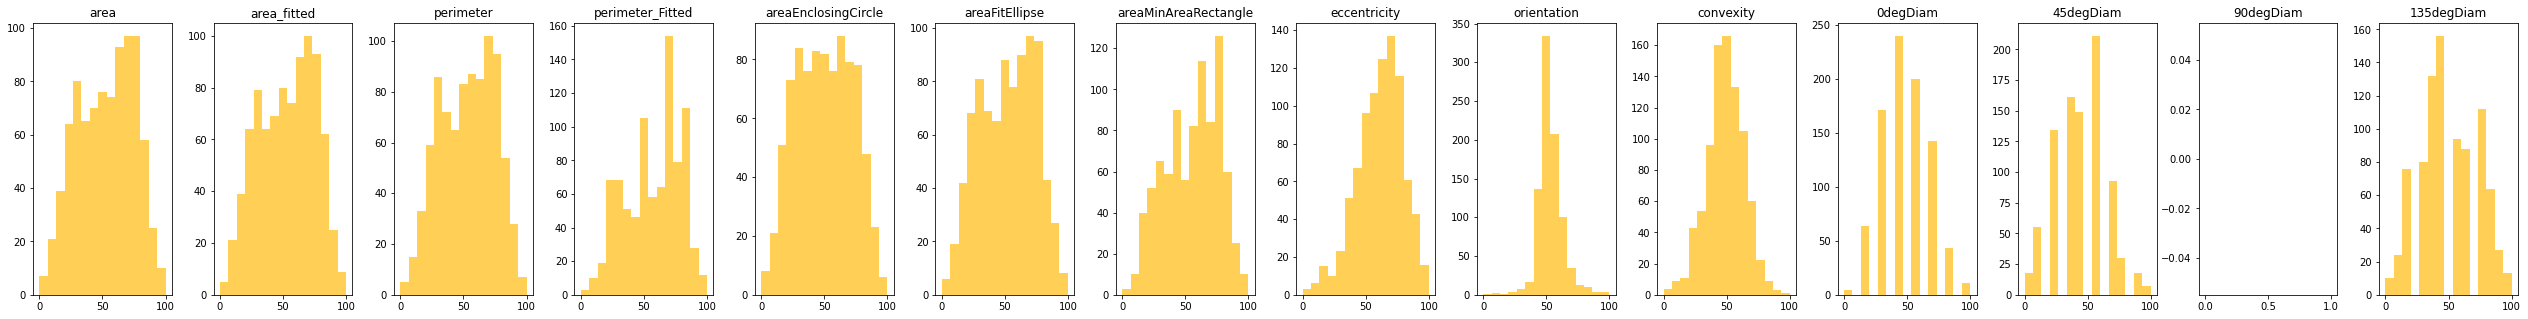

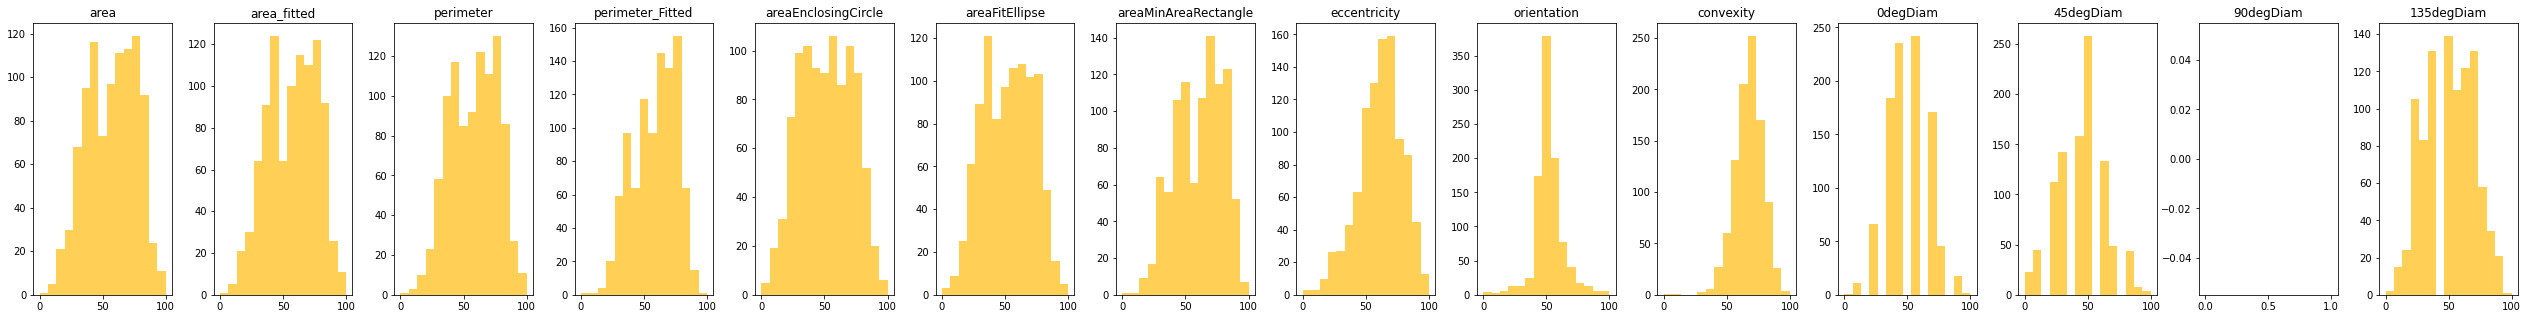

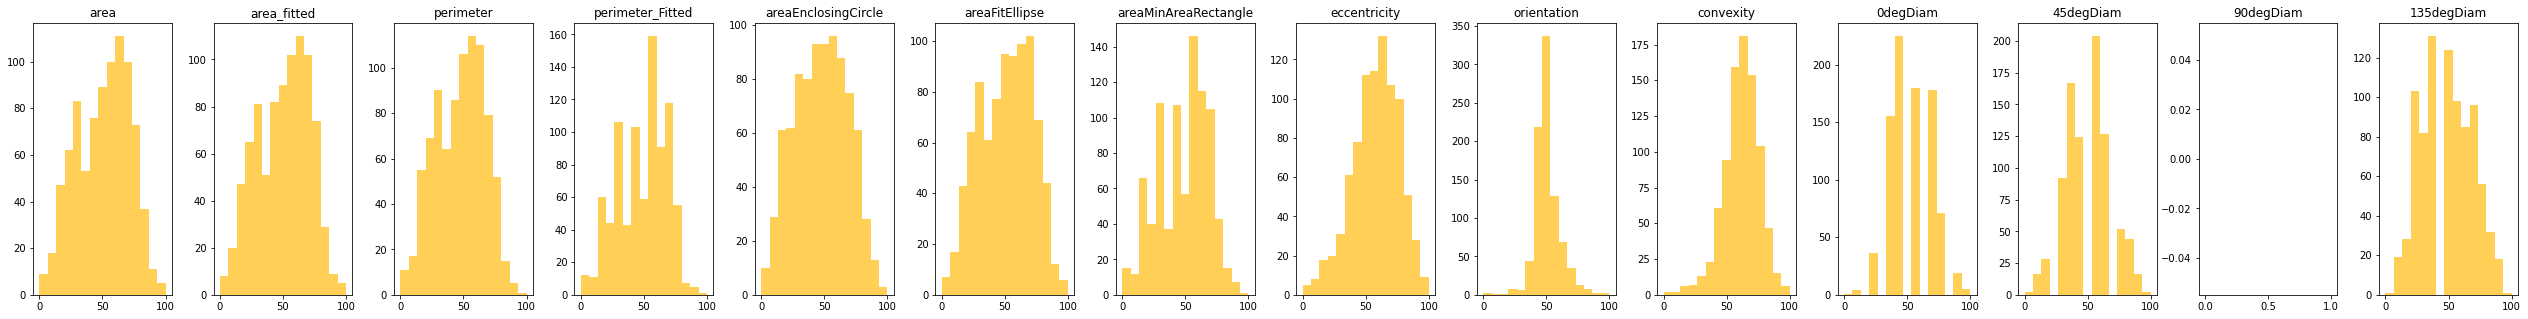

In [81]:
#As an example we display only histogram of the first set of replicates. In the next part we do data exploartion by displaying
# all histograms and scatter plots to see the feature correspondence and/or relations
#Please note all theses displays are for enhanced data as we overwrote the variables used to wrangle original data

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        result[feature_name] = df[feature_name]
        if feature_name != 'file_name' and feature_name != 'label' and feature_name != 'location (X_Y)':
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result[feature_name] = 100*(df[feature_name] - min_value) / (max_value - min_value)
    return result

for f in range(0, len(dfx)):  
    dff = normalize(dfx[f][0])
    dff.hist(column=dfl, 
    bins=15,               
    grid=False,
    figsize=(51, 5),
    layout = (1, len(dfl)),
    orientation='vertical',
    color='#FFCF56');

##### 1.5.6 What are the features that correlate <a id='2.6.3.5.2_Distribution_of_weekday_and_weekend_price_by_state'></a>

Display of scatter plot between features would provide information about inter feature correlation and would 
allow us use a representative of correlated features for further analysis

c:\users\umesh adiga\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\umesh adiga\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


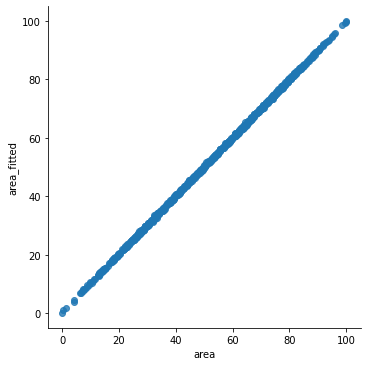

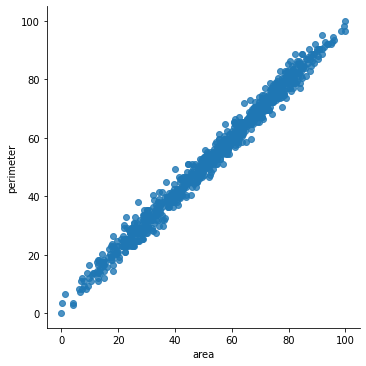

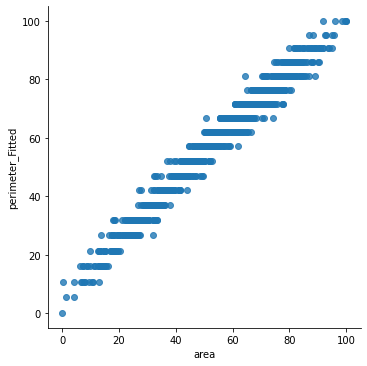

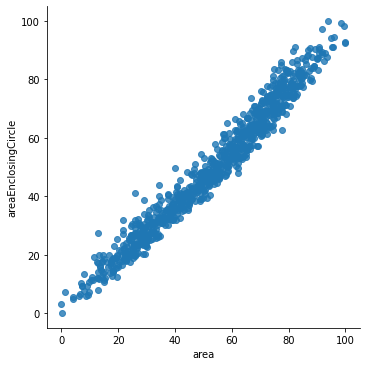

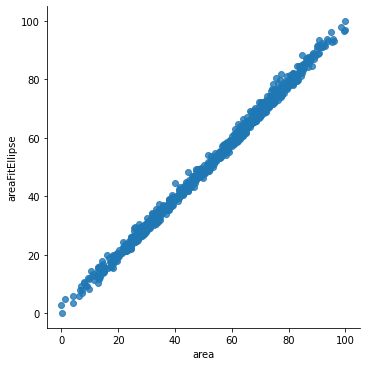

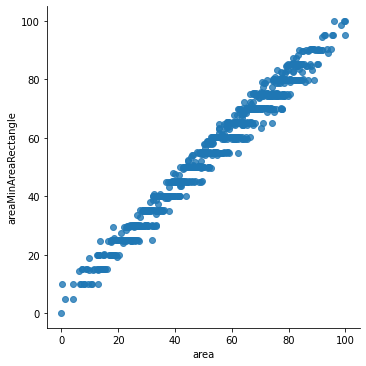

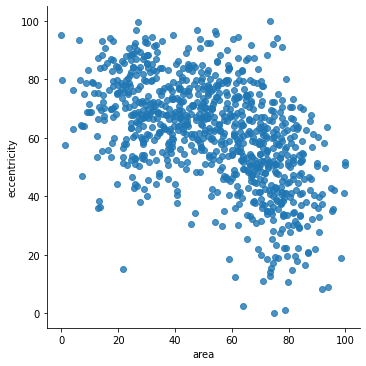

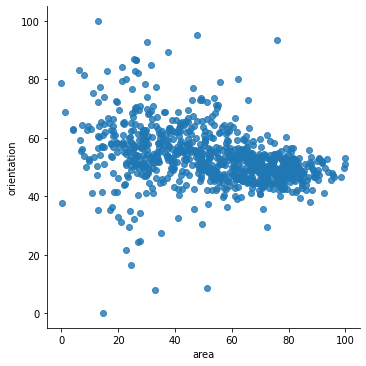

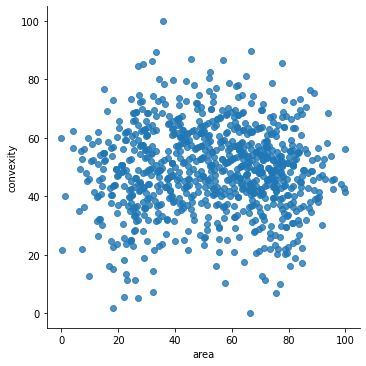

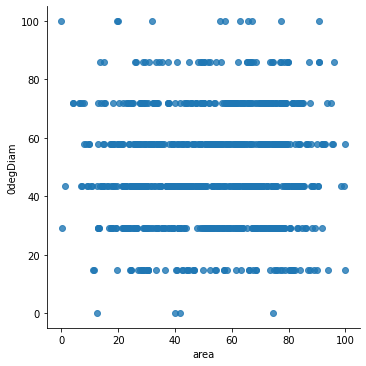

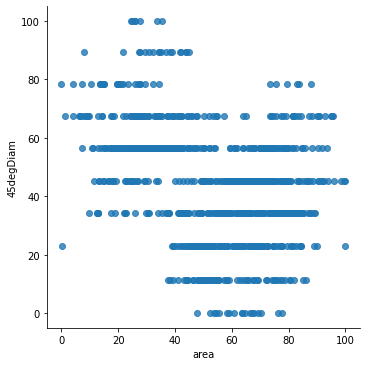

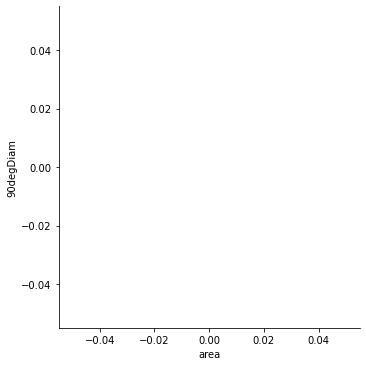

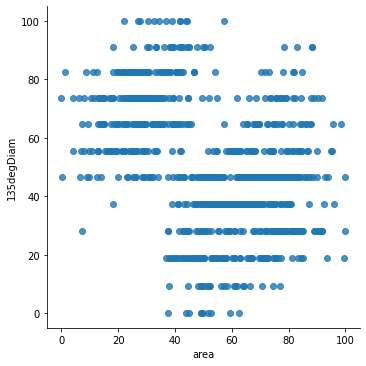

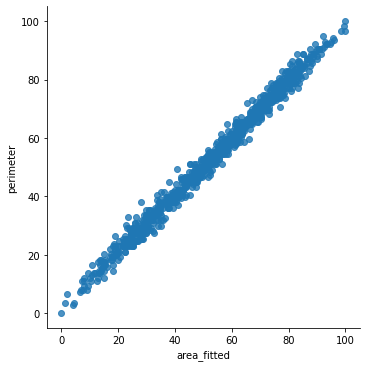

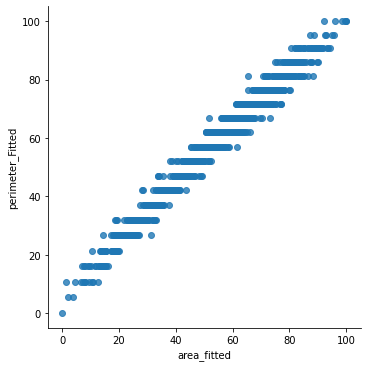

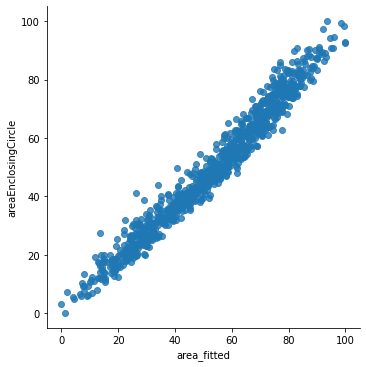

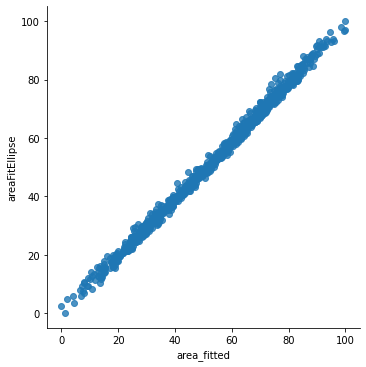

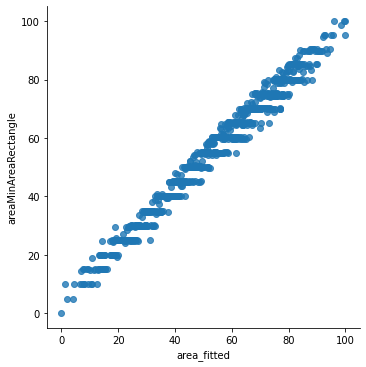

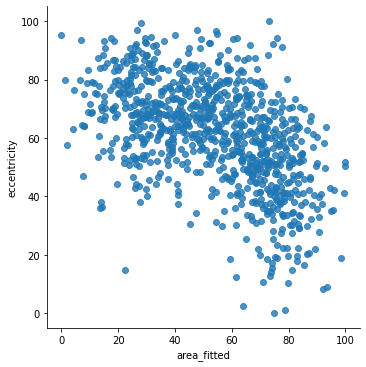

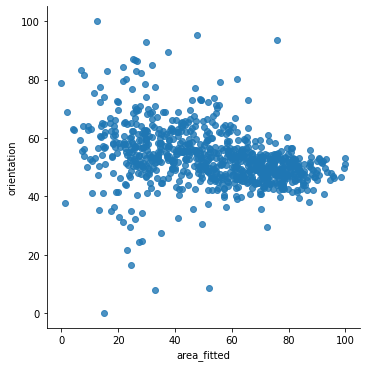

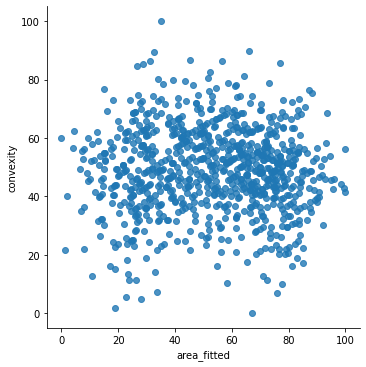

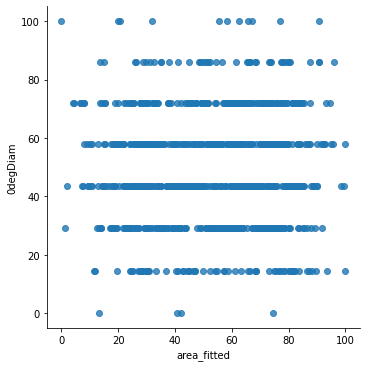

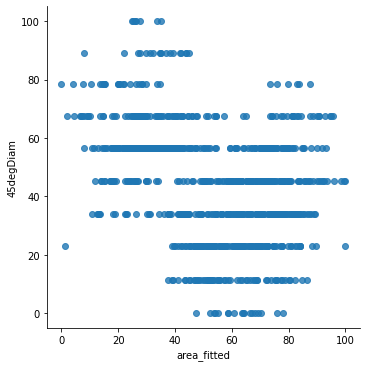

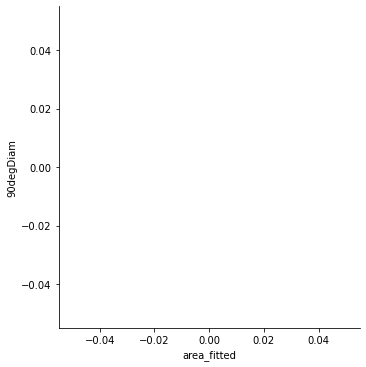

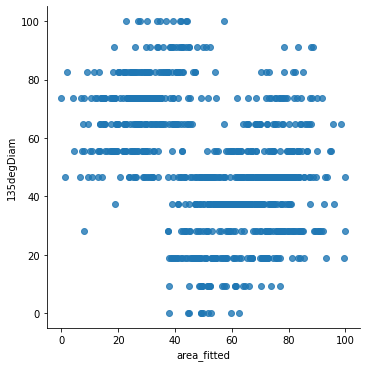

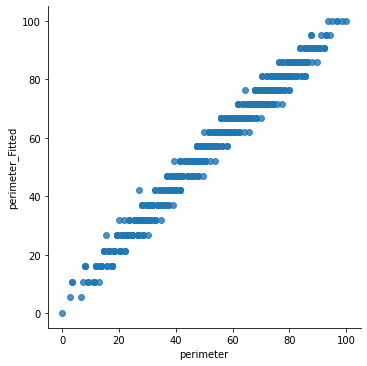

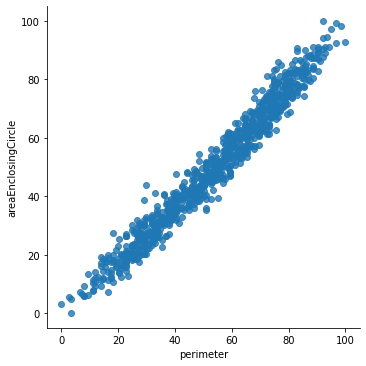

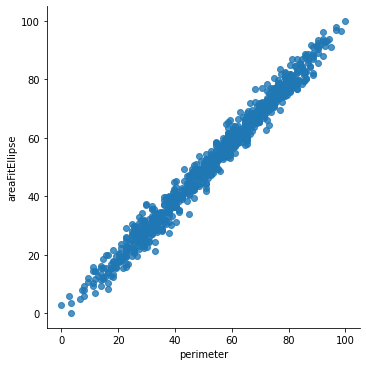

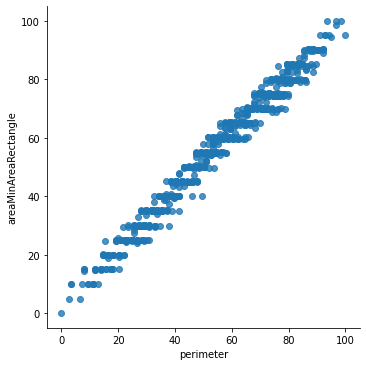

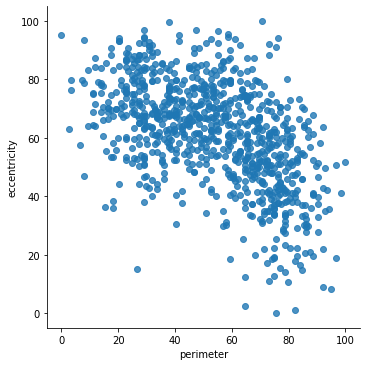

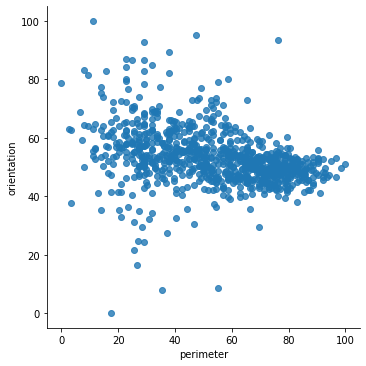

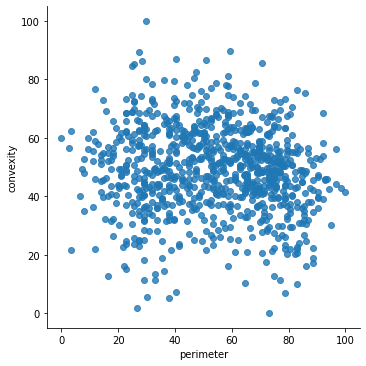

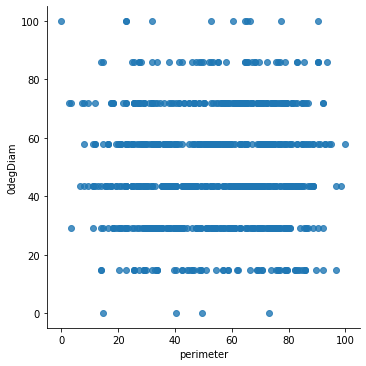

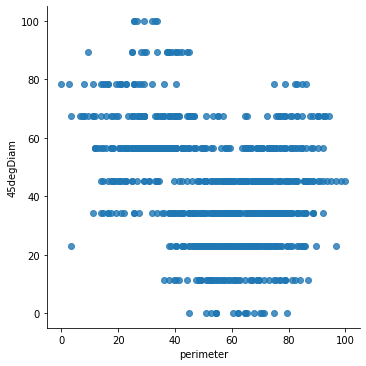

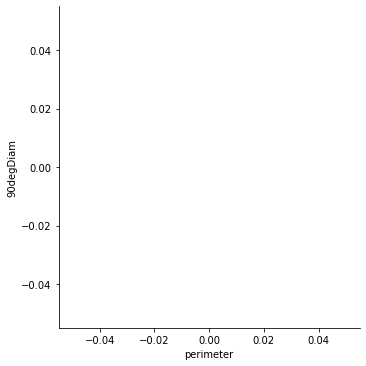

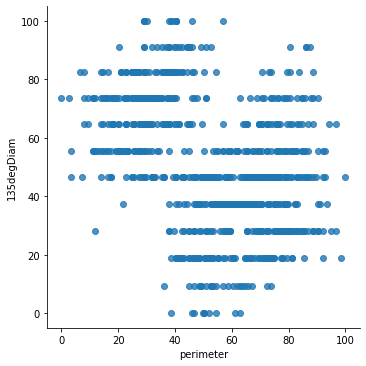

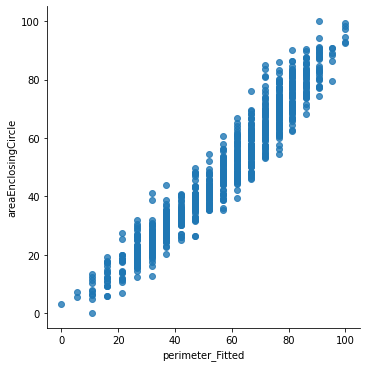

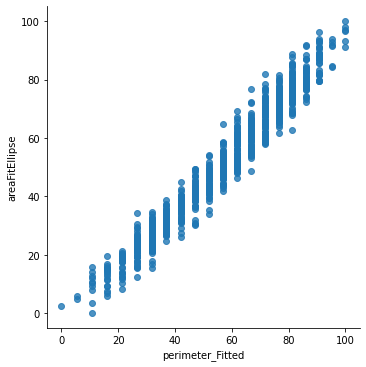

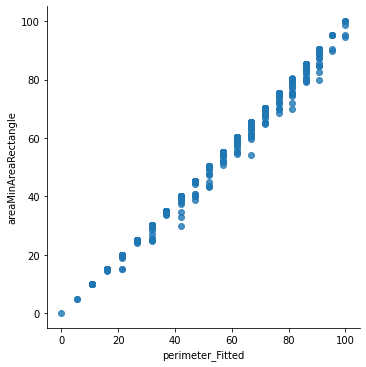

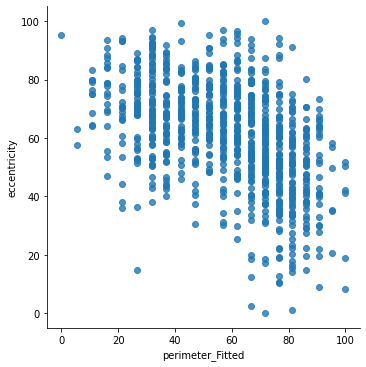

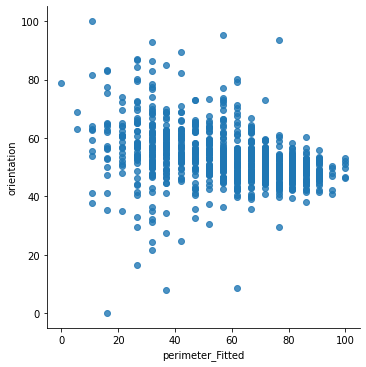

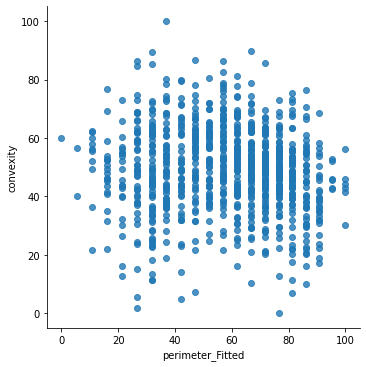

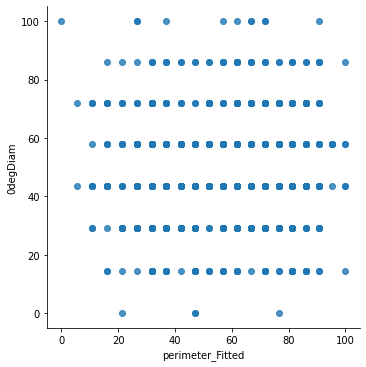

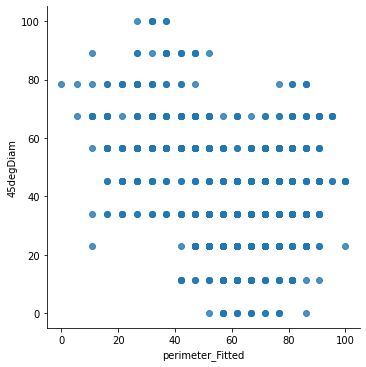

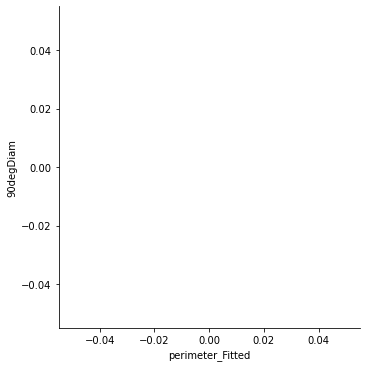

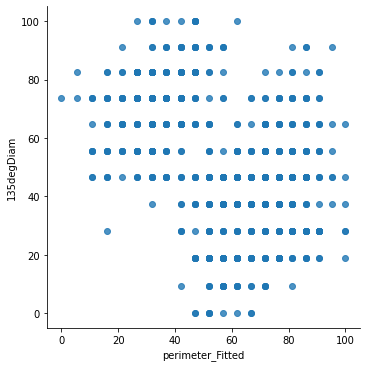

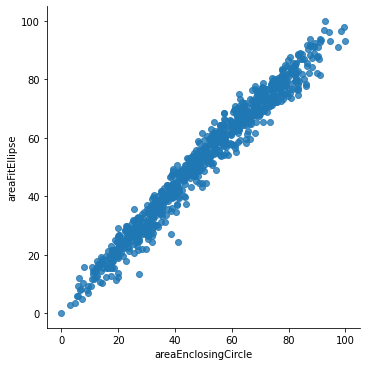

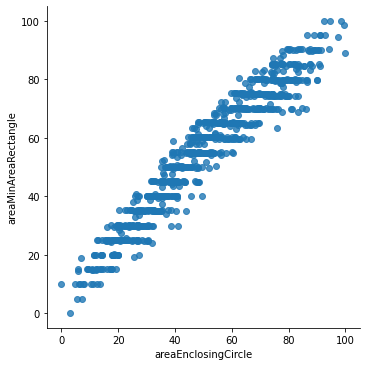

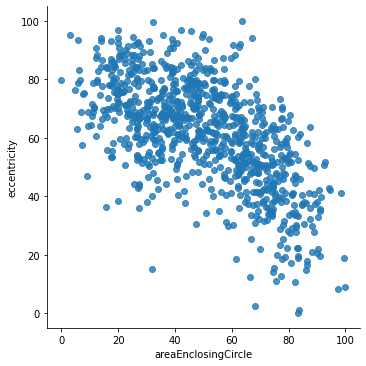

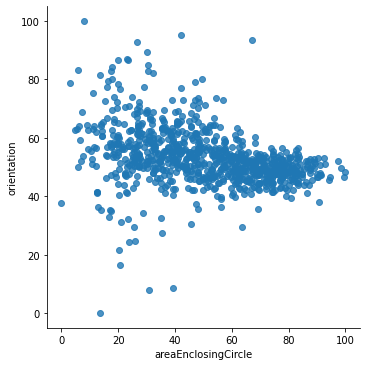

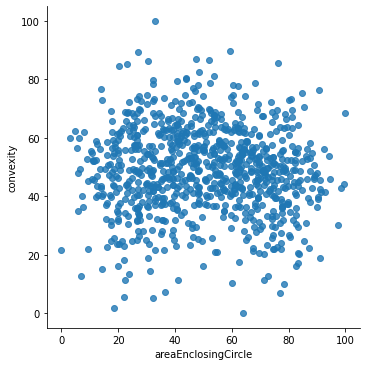

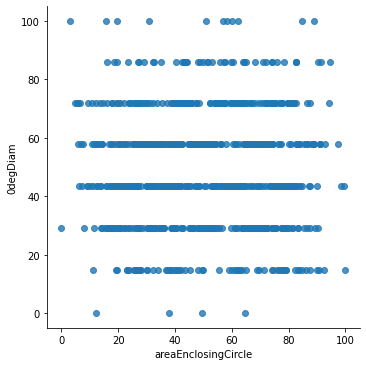

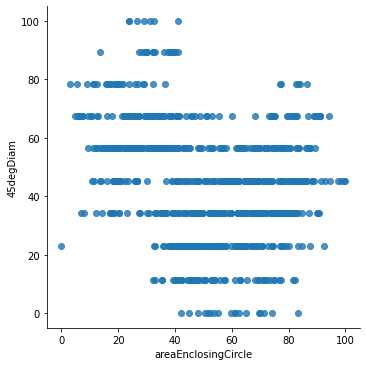

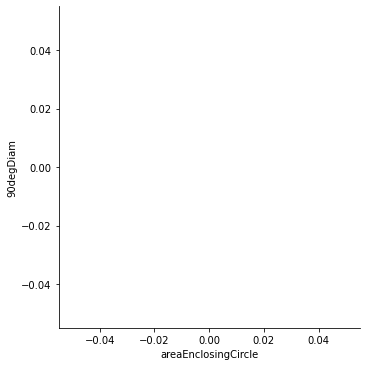

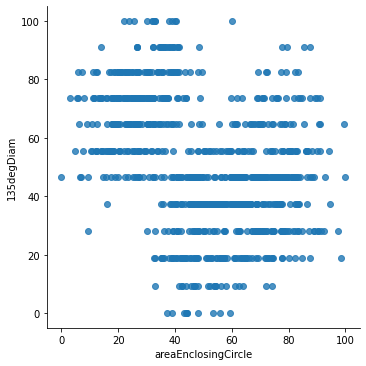

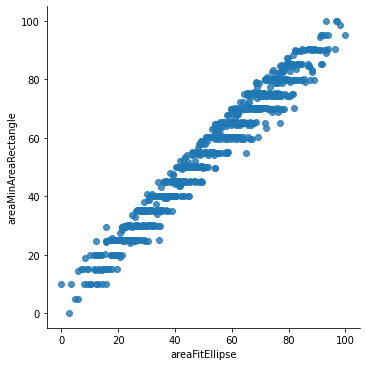

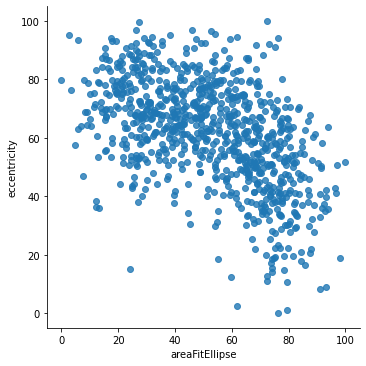

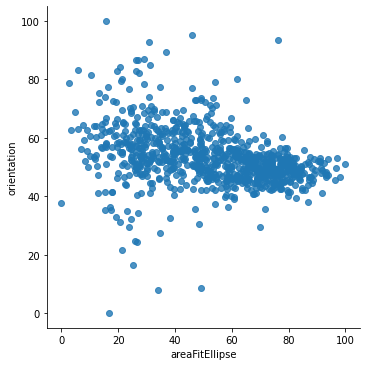

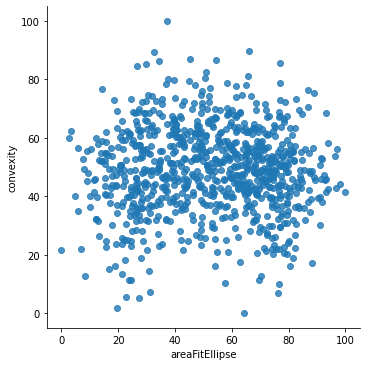

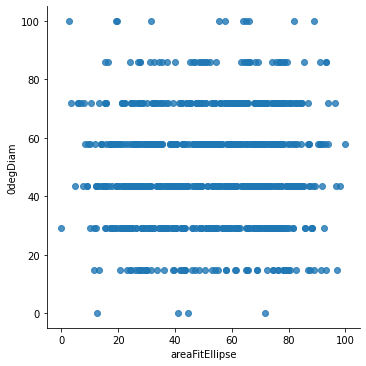

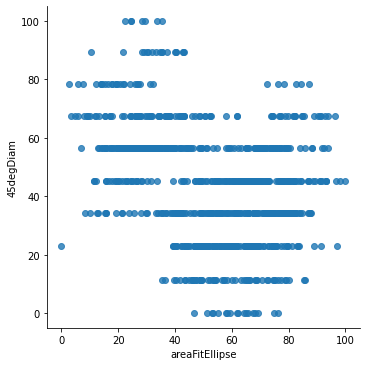

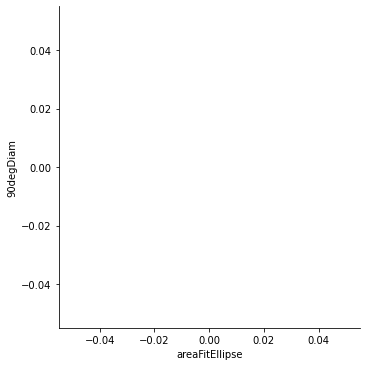

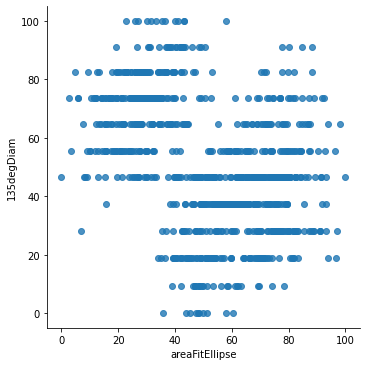

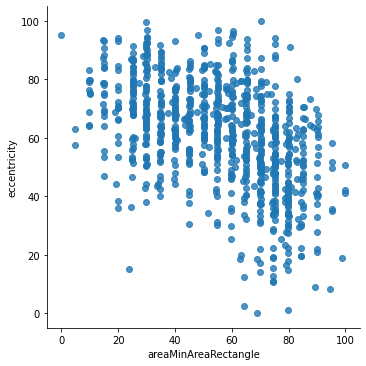

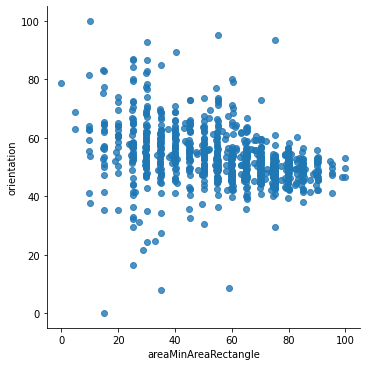

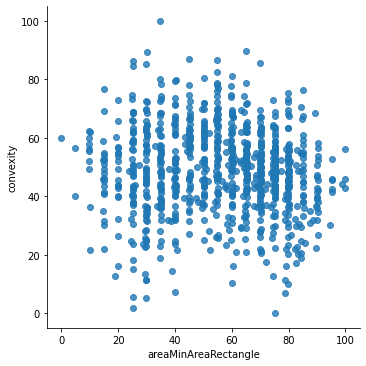

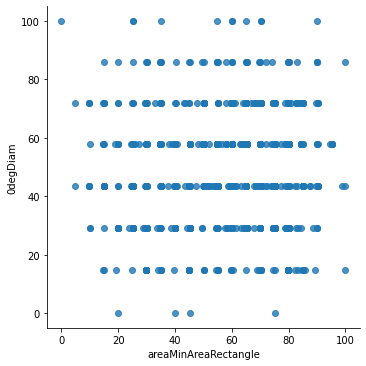

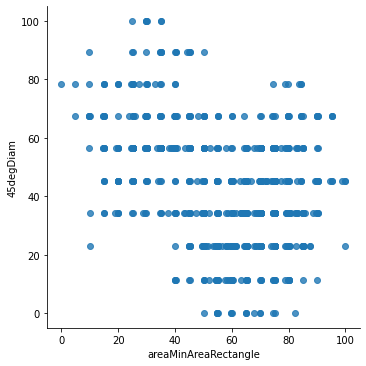

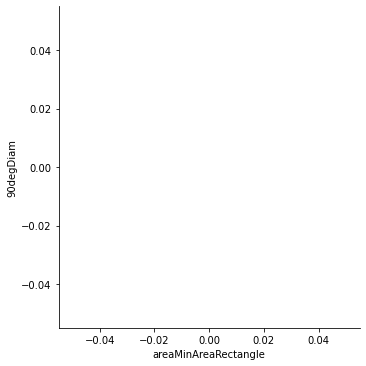

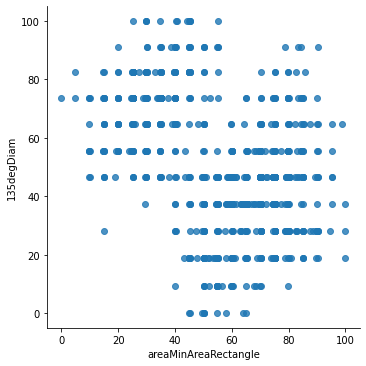

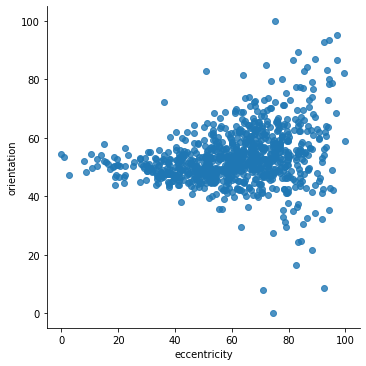

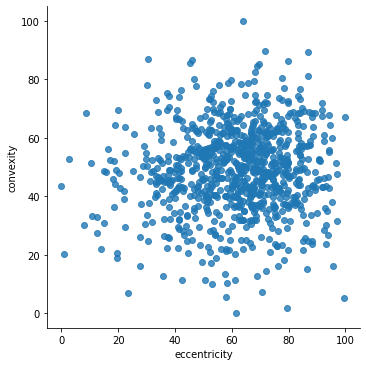

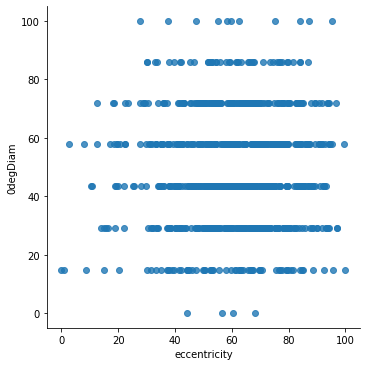

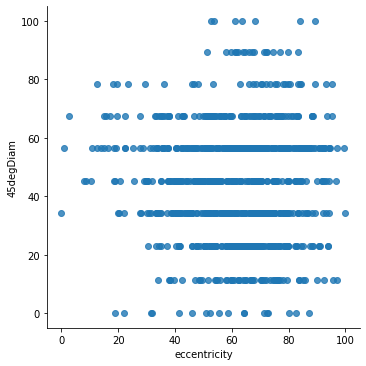

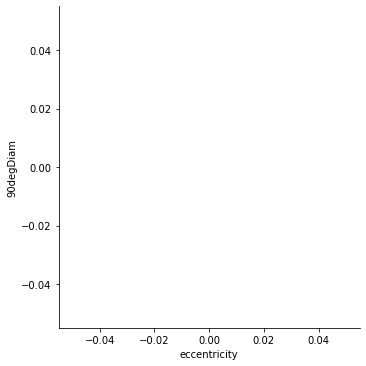

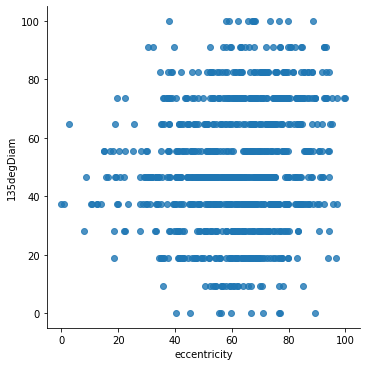

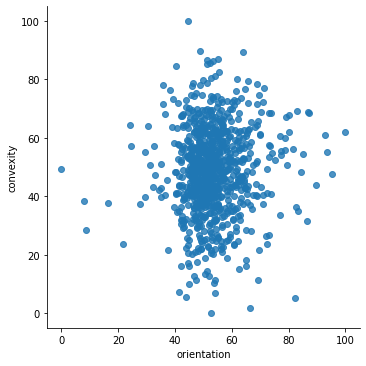

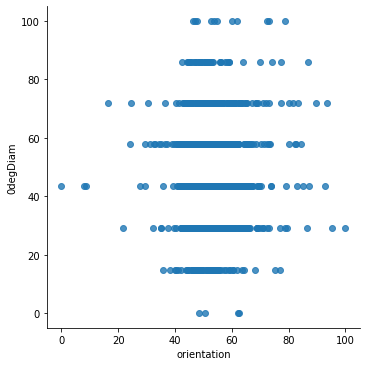

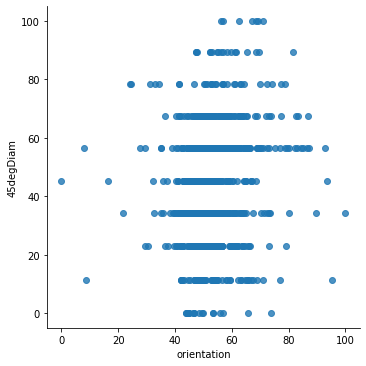

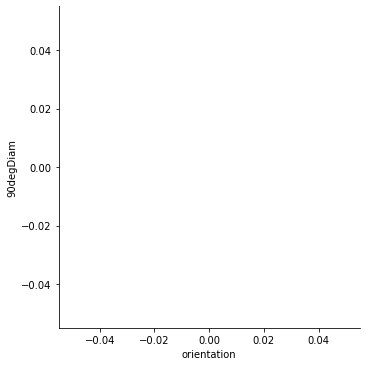

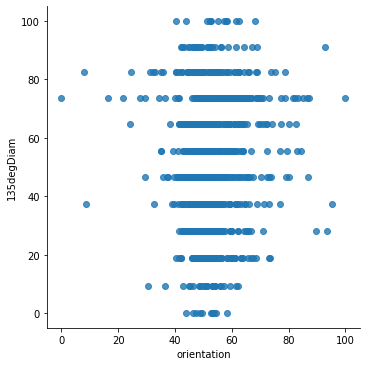

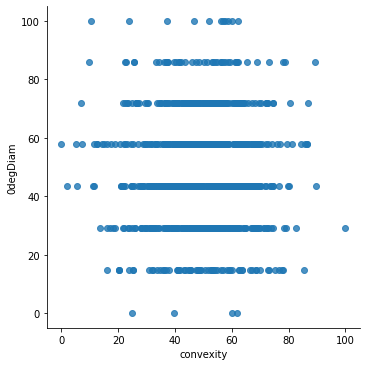

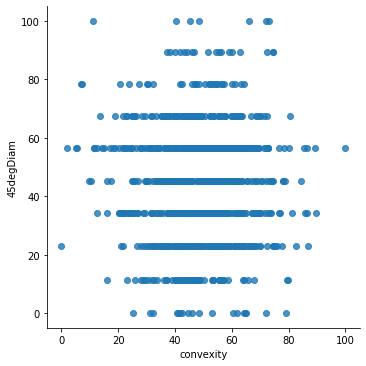

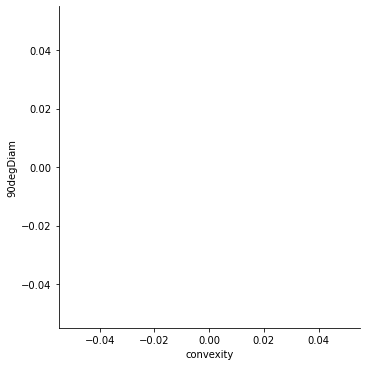

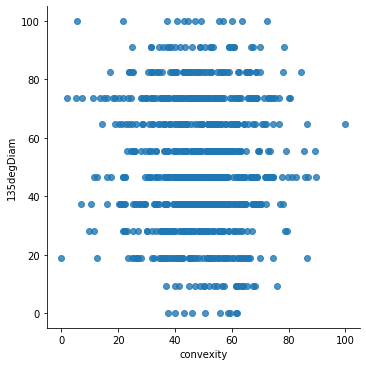

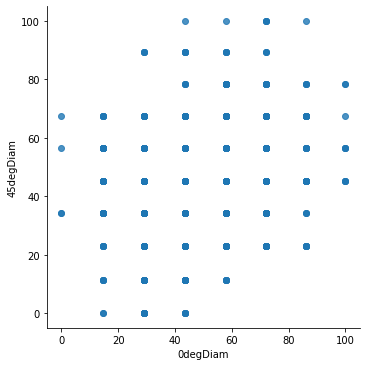

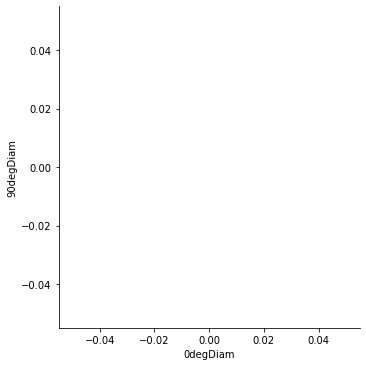

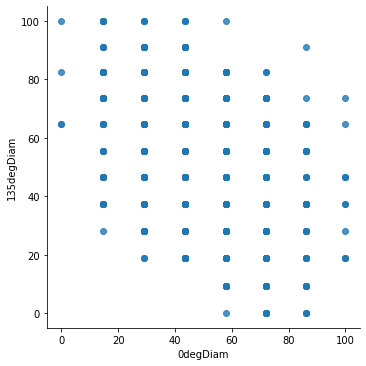

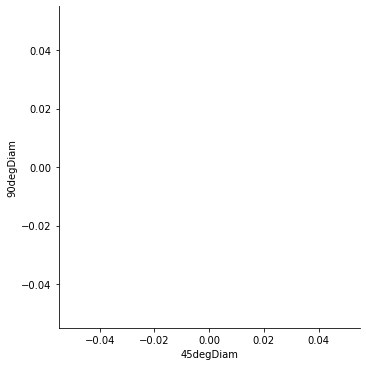

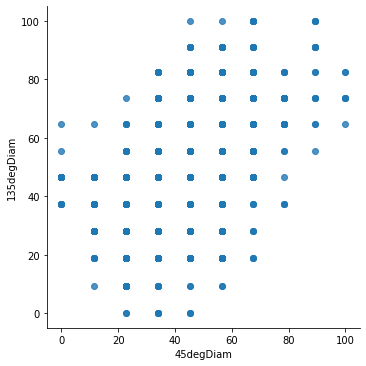

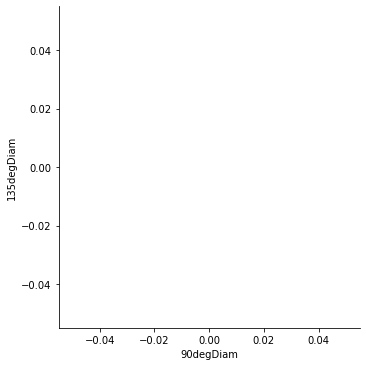

In [82]:
#Analysis on one file is enough to deduce interfeature relationship


df = normalize(dfx[0][0])
for l1 in range(2, (len(dfl)-1)):
    for l2 in range(l1+1, (len(dfl))):
        sns.lmplot(dfl[l1], dfl[l2], data=df, fit_reg=False)


## 2.0 Summary<a id='2.13_Summary'></a>

We have read multiple CSV files with different feature measurement values. We have added appropriate column headings and indexed the rows. Using one of the columns (location X_Y) in the primary measurement file of the triplicates, we have recognised corresponding row indexes in the remaining two files of the triplicate. This also allowed us to deduce missing measurement in the triplicate measurement files. We removed all Nan and partially represented features.
Every individual features from all the dataframes are plotted as histogram to reveal failure to read/compute data from a couple of files and one file with inconstent data distribution. The scatter plots have shown the relationship between different features allowing us to select only a representative feature of the correlated data for further analysis.

The whole process was then repeated for featues measured from enhanced image files.

Offline, we repeat the process on features measured from a fitted geometric shape too but that is not much important in the present task.
